#Getting Started with PySpark in Google Colab

PySpark is Python interface for Apache Spark. The primary use cases for PySpark are to work with huge amounts of data and for creating data pipelines.

You don't need to work with big data to benefit from PySpark. I find that the SparkSQL is a great tool for performing routine data anlysis. Pandas can get slow and you may find yourself writing a lot of code for data cleaning whereas the same actions take much less code in SQL. Let's get started!

See more here! http://spark.apache.org/docs/latest/api/python/

# 1. Installing PySpark in Google Colab

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,373 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [5,988 kB]
Get:14 http://se

In [ ]:
spark

# 2. Reading Data

For this example, I am going to use a publicly available data set in a CSV format.

In [ ]:
import requests

file_url = "https://raw.githubusercontent.com/duonghieu7104/Trend-Analysis-Aviation-Industry-US/main/data/US%20Airline%20Flight%20Routes%20and%20Fares%201993-2024.csv"
file_name = "US Airline Flight Routes and Fares 1993-2024.csv"

print(f"Downloading data from {file_url}...")
!wget -O "{file_name}" "{file_url}"

print("Loading data with multiLine option...")

df = spark.read \
    .option("header", "true") \
    .option("multiLine", "true") \
    .option("inferSchema", "true") \
    .option("quote", '"') \
    .option("escape", '"') \
    .csv(file_name)

print(f"Data loaded successfully!")
print(f"Dataset shape: ({df.count():,} rows, {len(df.columns)} columns)")
print(f"Columns: {df.columns}")

# Show first few rows
print("\nFirst 5 rows:")
df.show(5, truncate=False)

# Show data types
print("\nData types:")
df.printSchema()

--2025-10-18 05:05:23--  https://raw.githubusercontent.com/duonghieu7104/Trend-Analysis-Aviation-Industry-US/main/data/US%20Airline%20Flight%20Routes%20and%20Fares%201993-2024.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63039765 (60M) [text/plain]
Saving to: ‚ÄòUS Airline Flight Routes and Fares 1993-2024.csv‚Äô

US Airline Flight R 100%[===================>]  60.12M   328MB/s    in 0.2s    

2025-10-18 05:05:28 (328 MB/s) - ‚ÄòUS Airline Flight Routes and Fares 1993-2024.csv‚Äô saved [63039765/63039765]

Loading data with multiLine option...
Data loaded successfully!
Dataset shape: (245,955 rows, 23 columns)
Columns: ['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2

In [ ]:
# X·ª¨ L√ù GI√Å TR·ªä THI·∫æU
print("X·ª¨ L√ù GI√Å TR·ªä THI·∫æU")

from pyspark.sql.functions import col as spark_col

# Drop unnecessary columns and rows with missing values
df_clean = df.drop("Geocoded_City1", "Geocoded_City2") \
    .filter(
        spark_col("carrier_lg").isNotNull() &
        spark_col("large_ms").isNotNull() &
        spark_col("fare_lg").isNotNull() &
        spark_col("carrier_low").isNotNull() &
        spark_col("lf_ms").isNotNull() &
        spark_col("fare_low").isNotNull() &
        spark_col("nsmiles").isNotNull() &
        spark_col("fare").isNotNull() &
        spark_col("passengers").isNotNull()
    )

# Summary
original_count = df.count()
clean_count = df_clean.count()
removed_count = original_count - clean_count

print(f"Original dataset: {original_count:,} rows")
print(f"Clean dataset: {clean_count:,} rows")
print(f"Removed: {removed_count:,} rows ({removed_count/original_count*100:.2f}%)")

# Update df
df = df_clean

X·ª¨ L√ù GI√Å TR·ªä THI·∫æU
Original dataset: 245,955 rows
Clean dataset: 244,343 rows
Removed: 1,612 rows (0.66%)


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import numpy as np

# Ch·ªçn c√°c bi·∫øn s·ªë ƒë·ªÉ ph√¢n t√≠ch t∆∞∆°ng quan
numeric_vars = ['nsmiles', 'fare', 'passengers', 'quarter', 'Year',
                'large_ms', 'lf_ms', 'fare_lg', 'fare_low']

# T·∫°o vector t·ª´ c√°c bi·∫øn s·ªë
assembler_corr = VectorAssembler(inputCols=numeric_vars, outputCol="features")
df_corr = assembler_corr.transform(df.select(numeric_vars)).select("features")

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan Pearson
correlation_matrix = Correlation.corr(df_corr, "features").collect()[0][0]
corr_array = correlation_matrix.toArray()

# L∆∞u k·∫øt qu·∫£ ƒë·ªÉ s·ª≠ d·ª•ng sau
correlation_results = {}
for i, var1 in enumerate(numeric_vars):
    for j, var2 in enumerate(numeric_vars):
        correlation_results[f"{var1}__{var2}"] = corr_array[i, j]

In [ ]:
import pandas as pd

# L·∫•y t∆∞∆°ng quan c·ªßa t·∫•t c·∫£ bi·∫øn v·ªõi fare
fare_idx = numeric_vars.index('fare')
correlations_with_fare = []

for i, var in enumerate(numeric_vars):
    if var != 'fare':
        corr_value = corr_array[fare_idx, i]
        correlations_with_fare.append({
            'Bi·∫øn': var,
            'T∆∞∆°ng_quan': corr_value,
            'T∆∞∆°ng_quan_tuy·ªát_ƒë·ªëi': abs(corr_value)
        })

# Chuy·ªÉn sang DataFrame v√† s·∫Øp x·∫øp
corr_df = pd.DataFrame(correlations_with_fare)
corr_df = corr_df.sort_values('T∆∞∆°ng_quan_tuy·ªát_ƒë·ªëi', ascending=False)

# Ph√¢n lo·∫°i ƒë·ªô m·∫°nh t∆∞∆°ng quan
def classify_correlation(corr):
    abs_corr = abs(corr)
    if abs_corr >= 0.7:
        return 'R·∫•t m·∫°nh'
    elif abs_corr >= 0.5:
        return 'M·∫°nh'
    elif abs_corr >= 0.3:
        return 'Trung b√¨nh'
    elif abs_corr >= 0.1:
        return 'Y·∫øu'
    else:
        return 'R·∫•t y·∫øu'

corr_df['ƒê·ªô_m·∫°nh'] = corr_df['T∆∞∆°ng_quan'].apply(classify_correlation)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print("T∆Ø∆†NG QUAN V·ªöI GI√Å V√â (FARE):")
print(corr_df.to_string(index=False))

T∆Ø∆†NG QUAN V·ªöI GI√Å V√â (FARE):
      Bi·∫øn  T∆∞∆°ng_quan  T∆∞∆°ng_quan_tuy·ªát_ƒë·ªëi  ƒê·ªô_m·∫°nh
   fare_lg    0.956197              0.956197 R·∫•t m·∫°nh
  fare_low    0.874653              0.874653 R·∫•t m·∫°nh
   nsmiles    0.512181              0.512181     M·∫°nh
     lf_ms   -0.188844              0.188844      Y·∫øu
  large_ms   -0.182676              0.182676      Y·∫øu
passengers   -0.174401              0.174401      Y·∫øu
      Year    0.163892              0.163892      Y·∫øu
   quarter   -0.026766              0.026766  R·∫•t y·∫øu


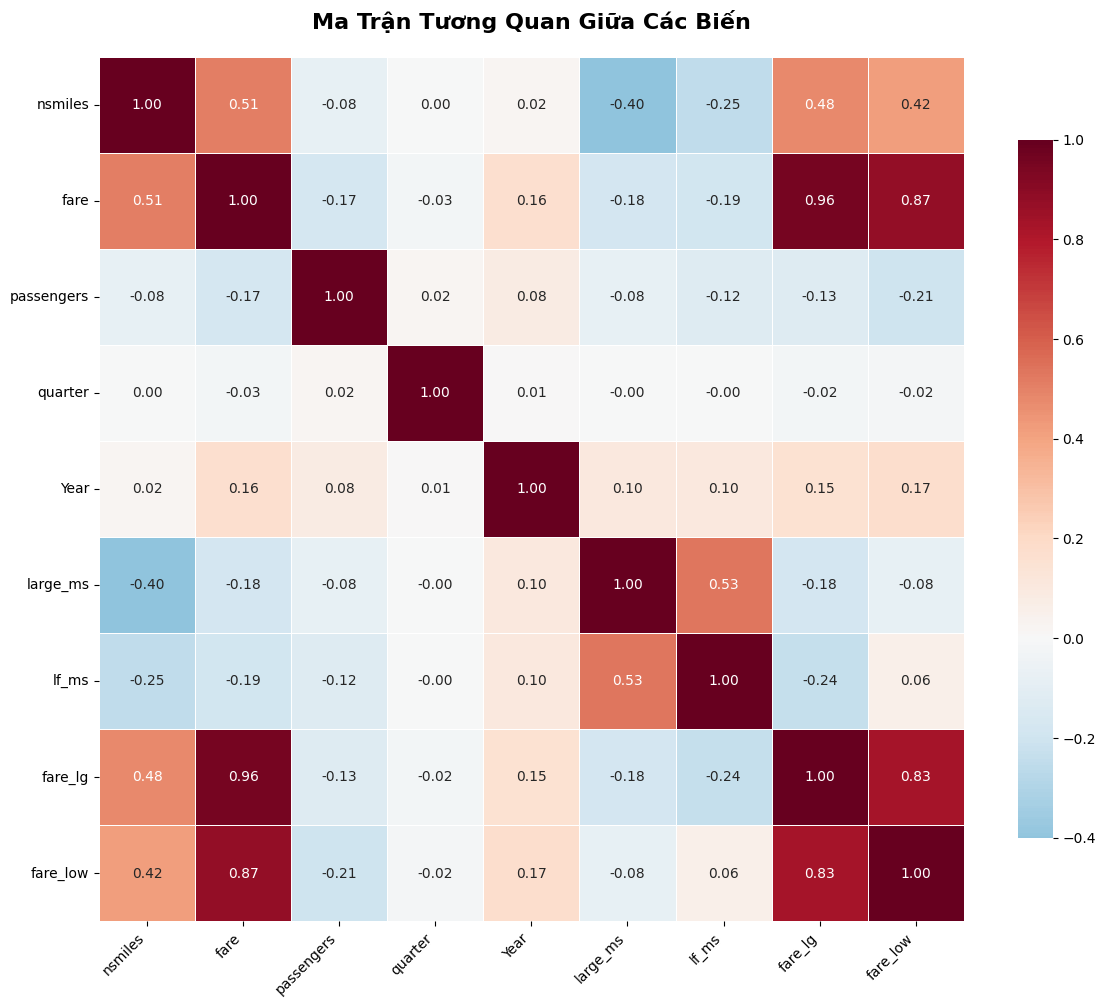

In [ ]:
# M·ª•c ƒë√≠ch: Tr·ª±c quan h√≥a ma tr·∫≠n t∆∞∆°ng quan

import matplotlib.pyplot as plt
import seaborn as sns

# T·∫°o DataFrame t·ª´ ma tr·∫≠n t∆∞∆°ng quan
corr_matrix_df = pd.DataFrame(
    corr_array,
    columns=numeric_vars,
    index=numeric_vars
)

# V·∫Ω heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix_df,
    annot=True,          # Hi·ªÉn th·ªã gi√° tr·ªã
    fmt='.2f',           # Format 2 ch·ªØ s·ªë th·∫≠p ph√¢n
    cmap='RdBu_r',       # M√†u: ƒë·ªè (d∆∞∆°ng) v√† xanh (√¢m)
    center=0,            # Trung t√¢m t·∫°i 0
    square=True,         # √î vu√¥ng
    linewidths=0.5,      # ƒê∆∞·ªùng vi·ªÅn
    cbar_kws={"shrink": 0.8}
)
plt.title('Ma Tr·∫≠n T∆∞∆°ng Quan Gi·ªØa C√°c Bi·∫øn', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Ch·ªçn c√°c bi·∫øn quan tr·ªçng ƒë·ªÉ ph√¢n t√≠ch
key_vars = ['nsmiles', 'fare', 'passengers']

# T√≠nh th·ªëng k√™ m√¥ t·∫£
stats_df = df.select(key_vars).describe()
stats_df.show()

# T√≠nh th√™m c√°c th·ªëng k√™ b·ªï sung (percentiles)
from pyspark.sql.functions import expr

print("\nPH√ÇN V·ªä (PERCENTILES):")
for var in key_vars:
    quantiles = df.approxQuantile(var, [0.25, 0.5, 0.75, 0.95, 0.99], 0.01)
    print(f"\n{var}:")
    print(f"  25%: {quantiles[0]:,.2f}")
    print(f"  50% (median): {quantiles[1]:,.2f}")
    print(f"  75%: {quantiles[2]:,.2f}")
    print(f"  95%: {quantiles[3]:,.2f}")
    print(f"  99%: {quantiles[4]:,.2f}")

+-------+------------------+------------------+-----------------+
|summary|           nsmiles|              fare|       passengers|
+-------+------------------+------------------+-----------------+
|  count|            244343|            244343|           244343|
|   mean|1189.4210556471844|218.44394040344534|301.4425582071105|
| stddev| 702.8892334240609| 79.53309940806469|512.4984522750754|
|    min|               109|              50.0|                0|
|    max|              2724|            3377.0|             8301|
+-------+------------------+------------------+-----------------+


PH√ÇN V·ªä (PERCENTILES):

nsmiles:
  25%: 607.00
  50% (median): 1,017.00
  75%: 1,695.00
  95%: 2,510.00
  99%: 2,724.00

fare:
  25%: 162.71
  50% (median): 207.88
  75%: 261.85
  95%: 344.83
  99%: 3,377.00

passengers:
  25%: 22.00
  50% (median): 116.00
  75%: 327.00
  95%: 1,215.00
  99%: 8,301.00


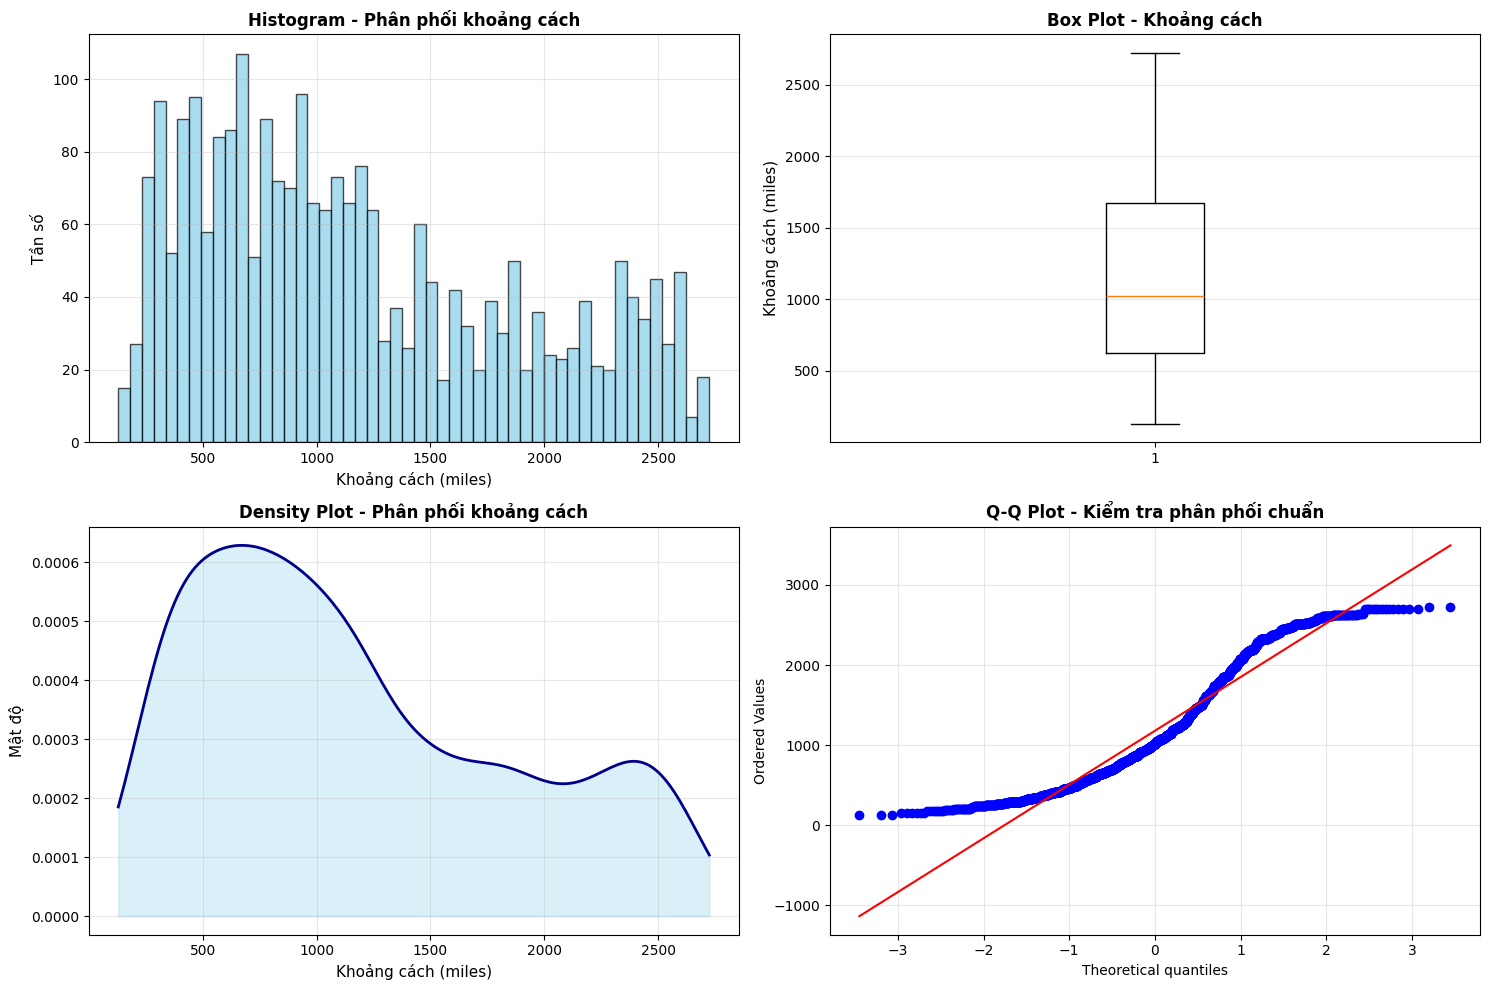

In [ ]:
# M·ª•c ƒë√≠ch: Hi·ªÉu ph√¢n ph·ªëi c·ªßa bi·∫øn kho·∫£ng c√°ch bay

# L·∫•y m·∫´u d·ªØ li·ªáu ƒë·ªÉ v·∫Ω (tr√°nh qu√° t·∫£i)
sample_size = 0.01  # 1% d·ªØ li·ªáu
distance_sample = df.select('nsmiles').sample(False, sample_size, seed=42).toPandas()

# T·∫°o figure v·ªõi nhi·ªÅu subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram
axes[0, 0].hist(distance_sample['nsmiles'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Kho·∫£ng c√°ch (miles)', fontsize=11)
axes[0, 0].set_ylabel('T·∫ßn s·ªë', fontsize=11)
axes[0, 0].set_title('Histogram - Ph√¢n ph·ªëi kho·∫£ng c√°ch', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot
axes[0, 1].boxplot(distance_sample['nsmiles'], vert=True)
axes[0, 1].set_ylabel('Kho·∫£ng c√°ch (miles)', fontsize=11)
axes[0, 1].set_title('Box Plot - Kho·∫£ng c√°ch', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. KDE (Kernel Density Estimation)
from scipy import stats
density = stats.gaussian_kde(distance_sample['nsmiles'])
x_range = np.linspace(distance_sample['nsmiles'].min(), distance_sample['nsmiles'].max(), 200)
axes[1, 0].plot(x_range, density(x_range), linewidth=2, color='darkblue')
axes[1, 0].fill_between(x_range, density(x_range), alpha=0.3, color='skyblue')
axes[1, 0].set_xlabel('Kho·∫£ng c√°ch (miles)', fontsize=11)
axes[1, 0].set_ylabel('M·∫≠t ƒë·ªô', fontsize=11)
axes[1, 0].set_title('Density Plot - Ph√¢n ph·ªëi kho·∫£ng c√°ch', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q Plot (ki·ªÉm tra ph√¢n ph·ªëi chu·∫©n)
stats.probplot(distance_sample['nsmiles'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Ki·ªÉm tra ph√¢n ph·ªëi chu·∫©n', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

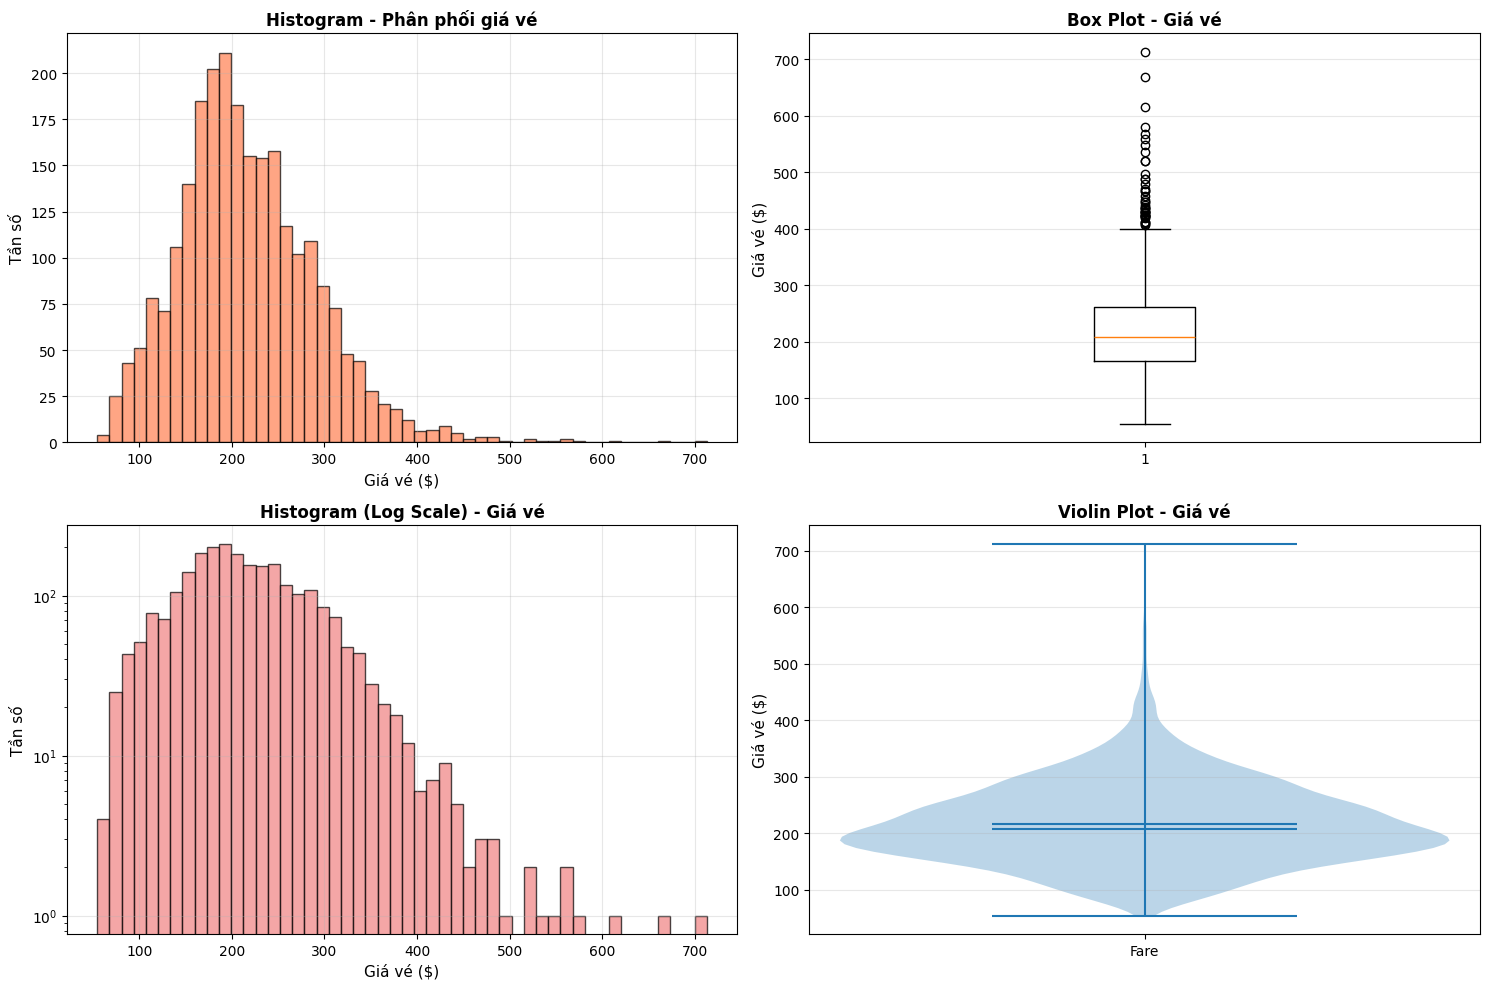

In [ ]:
# M·ª•c ƒë√≠ch: Hi·ªÉu ph√¢n ph·ªëi c·ªßa bi·∫øn gi√° v√©

# L·∫•y m·∫´u d·ªØ li·ªáu
fare_sample = df.select('fare').sample(False, sample_size, seed=42).toPandas()

# T·∫°o figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram
axes[0, 0].hist(fare_sample['fare'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 0].set_xlabel('Gi√° v√© ($)', fontsize=11)
axes[0, 0].set_ylabel('T·∫ßn s·ªë', fontsize=11)
axes[0, 0].set_title('Histogram - Ph√¢n ph·ªëi gi√° v√©', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot
axes[0, 1].boxplot(fare_sample['fare'], vert=True)
axes[0, 1].set_ylabel('Gi√° v√© ($)', fontsize=11)
axes[0, 1].set_title('Box Plot - Gi√° v√©', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Histogram v·ªõi log scale (ƒë·ªÉ th·∫•y r√µ c√°c gi√° tr·ªã th·∫•p)
axes[1, 0].hist(fare_sample['fare'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1, 0].set_xlabel('Gi√° v√© ($)', fontsize=11)
axes[1, 0].set_ylabel('T·∫ßn s·ªë', fontsize=11)
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Histogram (Log Scale) - Gi√° v√©', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Violin plot
parts = axes[1, 1].violinplot([fare_sample['fare']], vert=True, showmeans=True, showmedians=True)
axes[1, 1].set_ylabel('Gi√° v√© ($)', fontsize=11)
axes[1, 1].set_title('Violin Plot - Gi√° v√©', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks([1])
axes[1, 1].set_xticklabels(['Fare'])
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

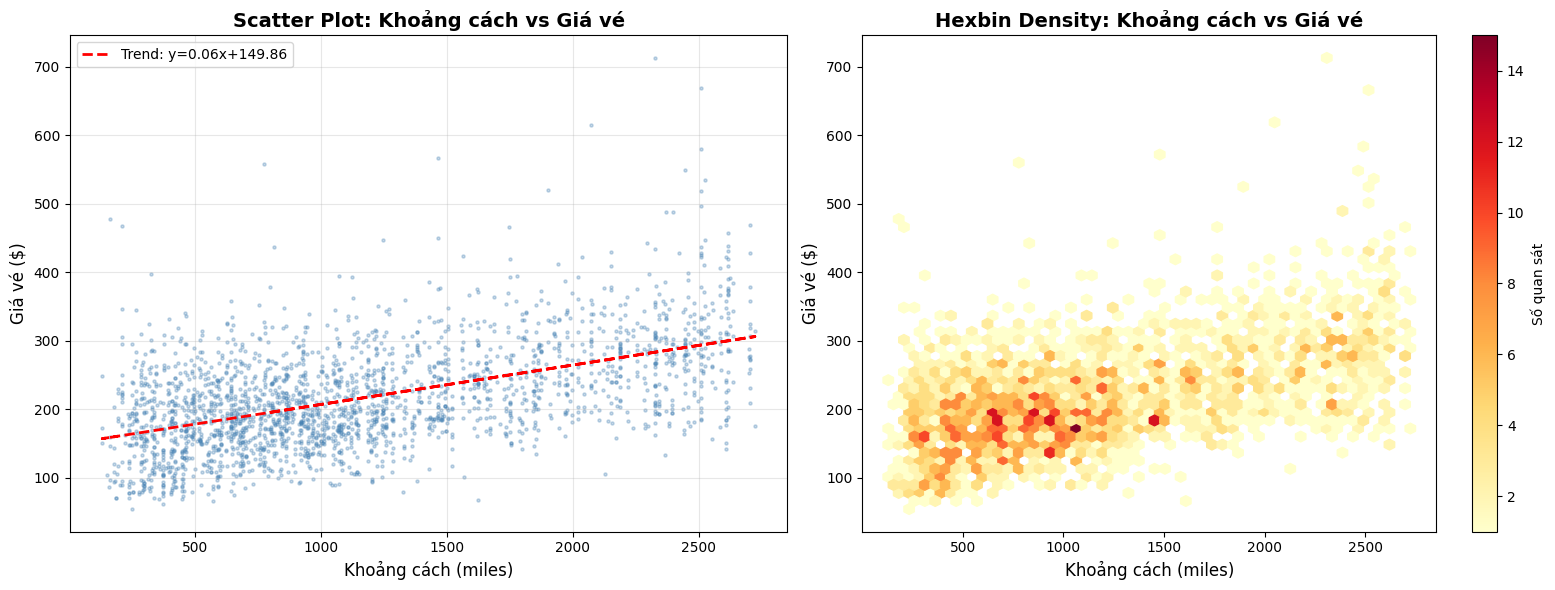


H·ªá s·ªë t∆∞∆°ng quan Pearson: 0.5122


In [ ]:
# M·ª•c ƒë√≠ch: Tr·ª±c quan h√≥a m·ªëi quan h·ªá gi·ªØa kho·∫£ng c√°ch v√† gi√° v√©

# L·∫•y m·∫´u d·ªØ li·ªáu
scatter_sample = df.select('nsmiles', 'fare').sample(False, sample_size, seed=42).toPandas()

# T·∫°o figure v·ªõi 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Scatter plot th√¥ng th∆∞·ªùng
axes[0].scatter(scatter_sample['nsmiles'], scatter_sample['fare'],
                alpha=0.3, s=5, color='steelblue')
axes[0].set_xlabel('Kho·∫£ng c√°ch (miles)', fontsize=12)
axes[0].set_ylabel('Gi√° v√© ($)', fontsize=12)
axes[0].set_title('Scatter Plot: Kho·∫£ng c√°ch vs Gi√° v√©', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Th√™m ƒë∆∞·ªùng xu h∆∞·ªõng (trend line)
z = np.polyfit(scatter_sample['nsmiles'], scatter_sample['fare'], 1)
p = np.poly1d(z)
axes[0].plot(scatter_sample['nsmiles'], p(scatter_sample['nsmiles']),
             "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
axes[0].legend(fontsize=10)

# 2. Hexbin plot (t·ªët h∆°n cho nhi·ªÅu ƒëi·ªÉm)
hb = axes[1].hexbin(scatter_sample['nsmiles'], scatter_sample['fare'],
                     gridsize=50, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Kho·∫£ng c√°ch (miles)', fontsize=12)
axes[1].set_ylabel('Gi√° v√© ($)', fontsize=12)
axes[1].set_title('Hexbin Density: Kho·∫£ng c√°ch vs Gi√° v√©', fontsize=14, fontweight='bold')
cb = plt.colorbar(hb, ax=axes[1])
cb.set_label('S·ªë quan s√°t', fontsize=10)

plt.tight_layout()
plt.show()

# In t∆∞∆°ng quan
corr_distance_fare = df.stat.corr("nsmiles", "fare")
print(f"\nH·ªá s·ªë t∆∞∆°ng quan Pearson: {corr_distance_fare:.4f}")

/tmp/ipython-input-3840824665.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=boxplot_data, x='nhom_khoang_cach', y='fare',
/tmp/ipython-input-3840824665.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=boxplot_data, x='nhom_khoang_cach', y='fare',


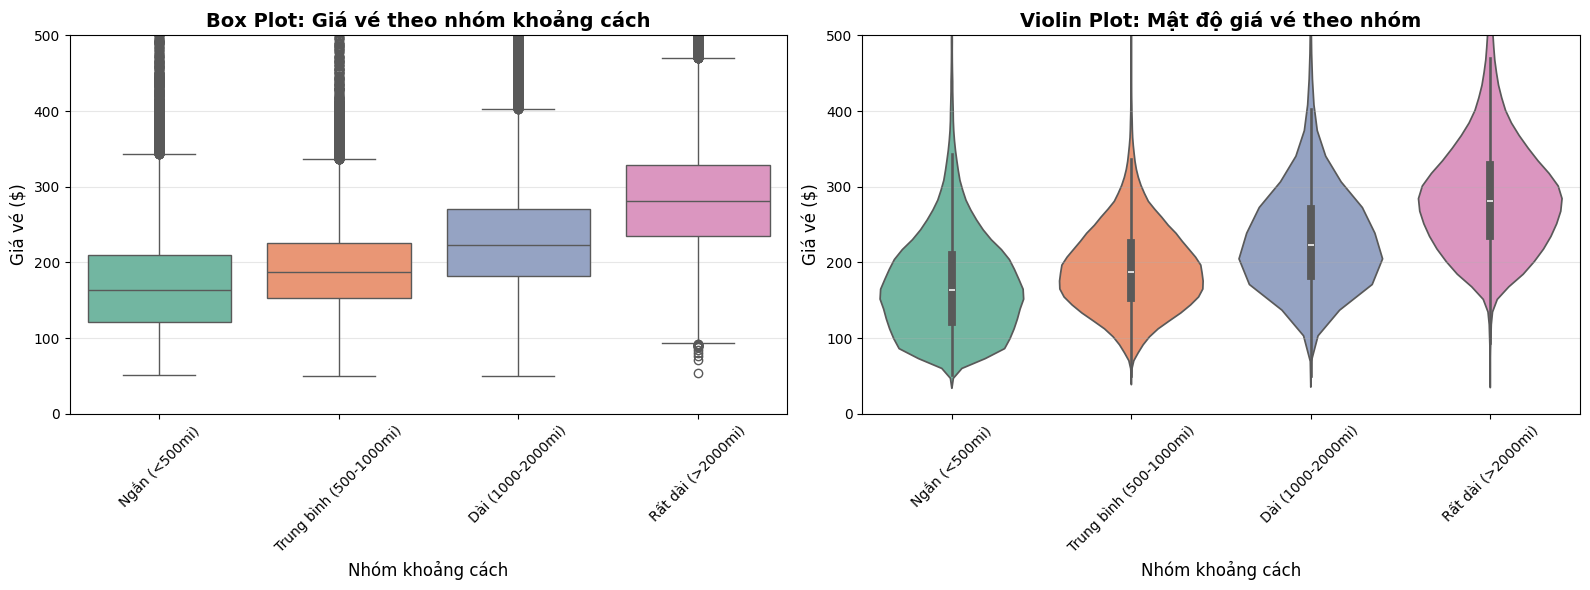


TH·ªêNG K√ä GI√Å V√â THEO NH√ìM KHO·∫¢NG C√ÅCH:
+--------------------+--------+------------------+-------------+------------+
|    nhom_khoang_cach|so_luong|    gia_trung_binh|gia_thap_nhat|gia_cao_nhat|
+--------------------+--------+------------------+-------------+------------+
|   D√†i (1000-2000mi)|   81735| 230.7397242307457|         50.0|      3377.0|
|       Ng·∫Øn (<500mi)|   45116|172.04356481070997|         50.5|      1312.0|
|   R·∫•t d√†i (>2000mi)|   43478|288.28362229173473|         53.5|      1664.0|
|Trung b√¨nh (500-1...|   74014|192.12343029697203|         50.4|      1069.0|
+--------------------+--------+------------------+-------------+------------+



In [ ]:
# M·ª•c ƒë√≠ch: So s√°nh gi√° v√© gi·ªØa c√°c nh√≥m kho·∫£ng c√°ch kh√°c nhau

# T·∫°o nh√≥m kho·∫£ng c√°ch
from pyspark.sql.functions import when, col, count, avg, min, max

df_grouped = df.withColumn('nhom_khoang_cach',
    when(col('nsmiles') < 500, 'Ng·∫Øn (<500mi)')
    .when((col('nsmiles') >= 500) & (col('nsmiles') < 1000), 'Trung b√¨nh (500-1000mi)')
    .when((col('nsmiles') >= 1000) & (col('nsmiles') < 2000), 'D√†i (1000-2000mi)')
    .otherwise('R·∫•t d√†i (>2000mi)')
)

# Chuy·ªÉn sang Pandas ƒë·ªÉ v·∫Ω
boxplot_data = df_grouped.select('nhom_khoang_cach', 'fare').toPandas()

# T·∫°o figure v·ªõi 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Box plot
order = ['Ng·∫Øn (<500mi)', 'Trung b√¨nh (500-1000mi)', 'D√†i (1000-2000mi)', 'R·∫•t d√†i (>2000mi)']
sns.boxplot(data=boxplot_data, x='nhom_khoang_cach', y='fare',
            order=order, ax=axes[0], palette='Set2')
axes[0].set_xlabel('Nh√≥m kho·∫£ng c√°ch', fontsize=12)
axes[0].set_ylabel('Gi√° v√© ($)', fontsize=12)
axes[0].set_title('Box Plot: Gi√° v√© theo nh√≥m kho·∫£ng c√°ch', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 500)  # Gi·ªõi h·∫°n ƒë·ªÉ lo·∫°i outliers
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Violin plot
sns.violinplot(data=boxplot_data, x='nhom_khoang_cach', y='fare',
               order=order, ax=axes[1], palette='Set2')
axes[1].set_xlabel('Nh√≥m kho·∫£ng c√°ch', fontsize=12)
axes[1].set_ylabel('Gi√° v√© ($)', fontsize=12)
axes[1].set_title('Violin Plot: M·∫≠t ƒë·ªô gi√° v√© theo nh√≥m', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 500)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Th·ªëng k√™ theo nh√≥m
print("\nTH·ªêNG K√ä GI√Å V√â THEO NH√ìM KHO·∫¢NG C√ÅCH:")
df_grouped.groupBy('nhom_khoang_cach').agg(
    count('fare').alias('so_luong'),
    avg('fare').alias('gia_trung_binh'),
    min('fare').alias('gia_thap_nhat'),
    max('fare').alias('gia_cao_nhat')
).orderBy('nhom_khoang_cach').show()

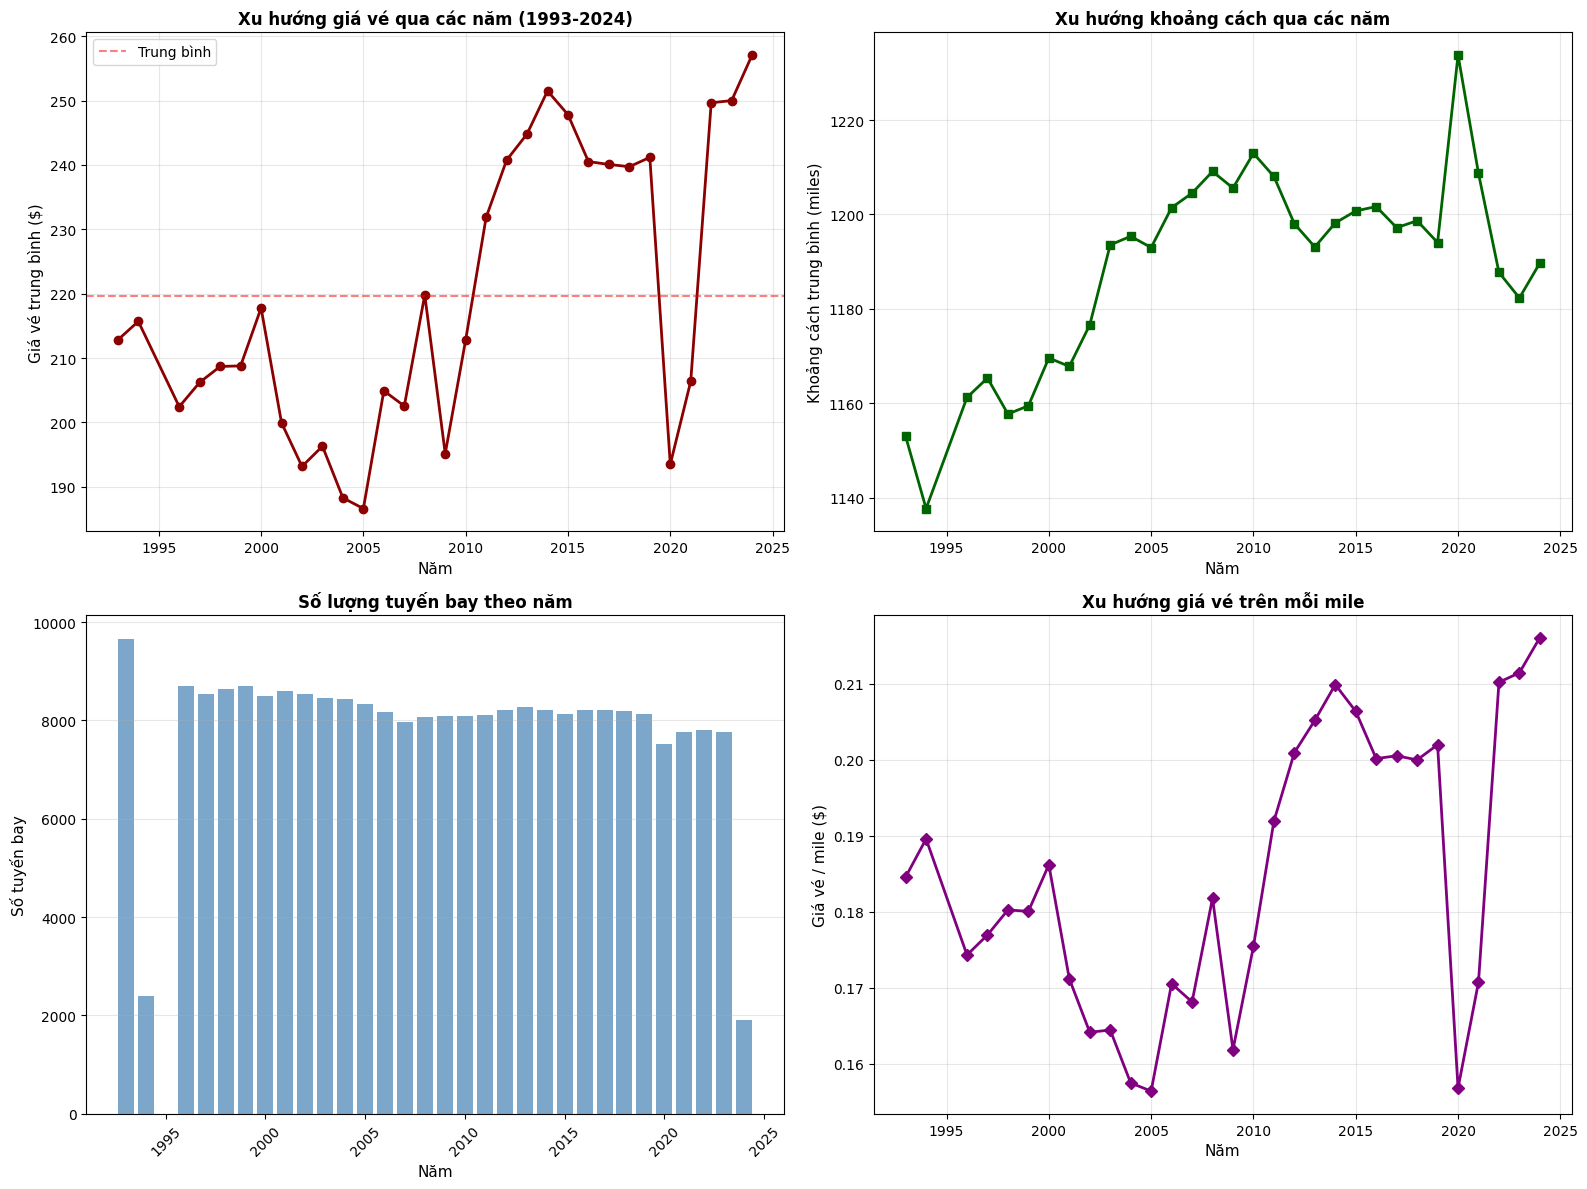

In [ ]:
# T√≠nh trung b√¨nh theo nƒÉm
yearly_stats = df.groupBy('Year').agg(
    avg('fare').alias('gia_trung_binh'),
    avg('nsmiles').alias('khoang_cach_trung_binh'),
    avg('passengers').alias('hanh_khach_trung_binh'),
    count('*').alias('so_chuyen')
).orderBy('Year').toPandas()

# T·∫°o figure v·ªõi 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gi√° v√© trung b√¨nh theo nƒÉm
axes[0, 0].plot(yearly_stats['Year'], yearly_stats['gia_trung_binh'],
                marker='o', linewidth=2, markersize=6, color='darkred')
axes[0, 0].set_xlabel('NƒÉm', fontsize=11)
axes[0, 0].set_ylabel('Gi√° v√© trung b√¨nh ($)', fontsize=11)
axes[0, 0].set_title('Xu h∆∞·ªõng gi√° v√© qua c√°c nƒÉm (1993-2024)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=yearly_stats['gia_trung_binh'].mean(),
                    color='r', linestyle='--', alpha=0.5, label='Trung b√¨nh')
axes[0, 0].legend()

# 2. Kho·∫£ng c√°ch trung b√¨nh theo nƒÉm
axes[0, 1].plot(yearly_stats['Year'], yearly_stats['khoang_cach_trung_binh'],
                marker='s', linewidth=2, markersize=6, color='darkgreen')
axes[0, 1].set_xlabel('NƒÉm', fontsize=11)
axes[0, 1].set_ylabel('Kho·∫£ng c√°ch trung b√¨nh (miles)', fontsize=11)
axes[0, 1].set_title('Xu h∆∞·ªõng kho·∫£ng c√°ch qua c√°c nƒÉm', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. S·ªë chuy·∫øn bay theo nƒÉm
axes[1, 0].bar(yearly_stats['Year'], yearly_stats['so_chuyen'],
               color='steelblue', alpha=0.7)
axes[1, 0].set_xlabel('NƒÉm', fontsize=11)
axes[1, 0].set_ylabel('S·ªë tuy·∫øn bay', fontsize=11)
axes[1, 0].set_title('S·ªë l∆∞·ª£ng tuy·∫øn bay theo nƒÉm', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Gi√° v√© tr√™n m·ªói mile
yearly_stats['gia_per_mile'] = yearly_stats['gia_trung_binh'] / yearly_stats['khoang_cach_trung_binh']
axes[1, 1].plot(yearly_stats['Year'], yearly_stats['gia_per_mile'],
                marker='D', linewidth=2, markersize=6, color='purple')
axes[1, 1].set_xlabel('NƒÉm', fontsize=11)
axes[1, 1].set_ylabel('Gi√° v√© / mile ($)', fontsize=11)
axes[1, 1].set_title('Xu h∆∞·ªõng gi√° v√© tr√™n m·ªói mile', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3486366275.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=quarterly_data, x='ten_quy', y='fare',


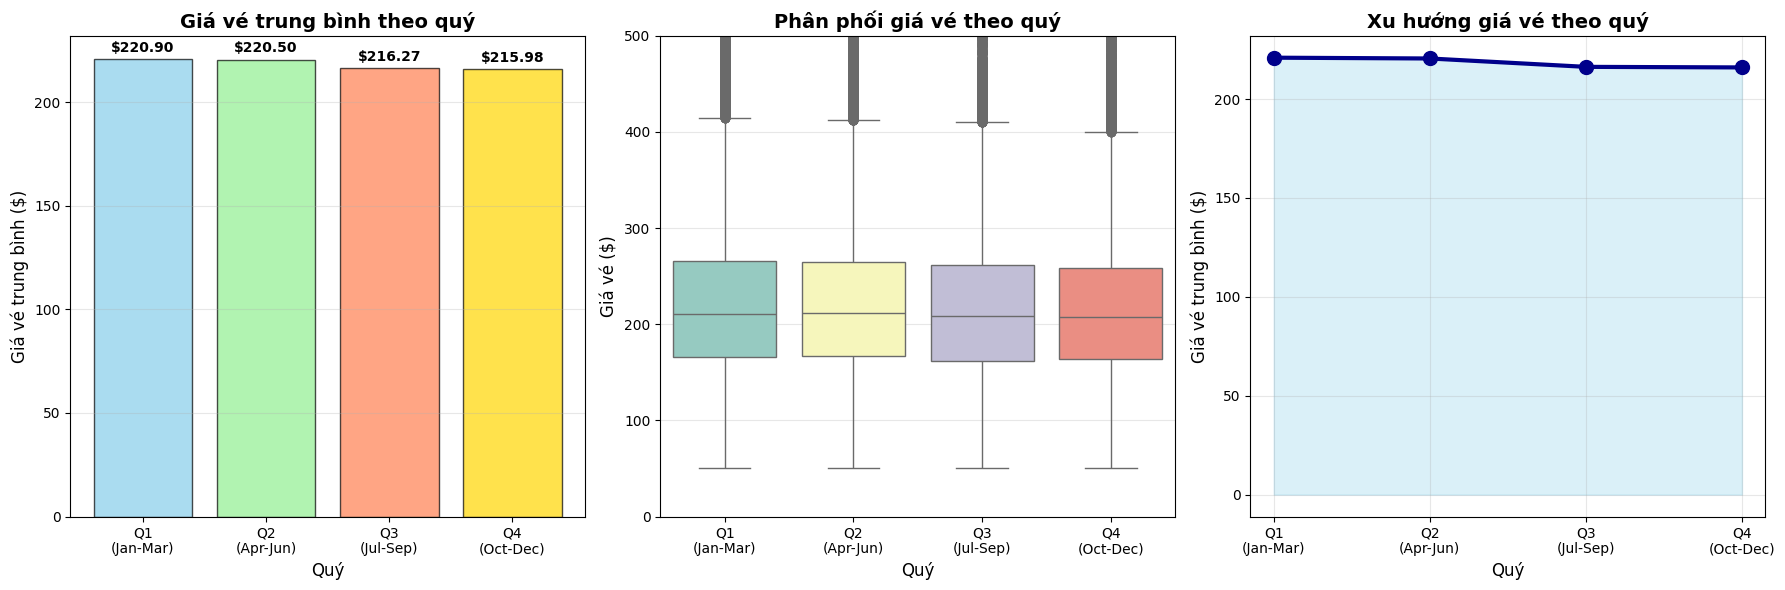


TH·ªêNG K√ä THEO QU√ù:
 quarter  gia_trung_binh  so_luong  gia_min  gia_max       ten_quy
       1      220.904761     63477    50.40  1161.22 Q1\n(Jan-Mar)
       2      220.498615     60181    50.00  1470.40 Q2\n(Apr-Jun)
       3      216.269382     60830    50.98  3377.00 Q3\n(Jul-Sep)
       4      215.978324     59855    50.50  1664.00 Q4\n(Oct-Dec)


In [ ]:
# M·ª•c ƒë√≠ch: Ki·ªÉm tra ·∫£nh h∆∞·ªüng c·ªßa m√πa v·ª• (qu√Ω) l√™n gi√° v√©

# T√≠nh th·ªëng k√™ theo qu√Ω
quarterly_stats = df.groupBy('quarter').agg(
    avg('fare').alias('gia_trung_binh'),
    count('*').alias('so_luong'),
    min('fare').alias('gia_min'),
    max('fare').alias('gia_max')
).orderBy('quarter').toPandas()

# ƒê·∫∑t t√™n qu√Ω
quarter_names = {1: 'Q1\n(Jan-Mar)', 2: 'Q2\n(Apr-Jun)',
                 3: 'Q3\n(Jul-Sep)', 4: 'Q4\n(Oct-Dec)'}
quarterly_stats['ten_quy'] = quarterly_stats['quarter'].map(quarter_names)

# L·∫•y d·ªØ li·ªáu ƒë·ªÉ v·∫Ω boxplot
quarterly_data = df.select('quarter', 'fare').toPandas()
quarterly_data['ten_quy'] = quarterly_data['quarter'].map(quarter_names)

# T·∫°o figure v·ªõi 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Bar chart - Gi√° trung b√¨nh theo qu√Ω
axes[0].bar(quarterly_stats['ten_quy'], quarterly_stats['gia_trung_binh'],
            color=['skyblue', 'lightgreen', 'coral', 'gold'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Qu√Ω', fontsize=12)
axes[0].set_ylabel('Gi√° v√© trung b√¨nh ($)', fontsize=12)
axes[0].set_title('Gi√° v√© trung b√¨nh theo qu√Ω', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
# Th√™m gi√° tr·ªã l√™n c·ªôt
for i, v in enumerate(quarterly_stats['gia_trung_binh']):
    axes[0].text(i, v + 2, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')

# 2. Box plot - Ph√¢n ph·ªëi theo qu√Ω
order = [quarter_names[i] for i in range(1, 5)]
sns.boxplot(data=quarterly_data, x='ten_quy', y='fare',
            order=order, ax=axes[1], palette='Set3')
axes[1].set_xlabel('Qu√Ω', fontsize=12)
axes[1].set_ylabel('Gi√° v√© ($)', fontsize=12)
axes[1].set_title('Ph√¢n ph·ªëi gi√° v√© theo qu√Ω', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 500)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Line chart - Xu h∆∞·ªõng qua c√°c qu√Ω
axes[2].plot(quarterly_stats['ten_quy'], quarterly_stats['gia_trung_binh'],
             marker='o', linewidth=3, markersize=10, color='darkblue')
axes[2].fill_between(range(len(quarterly_stats)), quarterly_stats['gia_trung_binh'],
                      alpha=0.3, color='skyblue')
axes[2].set_xlabel('Qu√Ω', fontsize=12)
axes[2].set_ylabel('Gi√° v√© trung b√¨nh ($)', fontsize=12)
axes[2].set_title('Xu h∆∞·ªõng gi√° v√© theo qu√Ω', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# In b·∫£ng th·ªëng k√™
print("\nTH·ªêNG K√ä THEO QU√ù:")
print(quarterly_stats.to_string(index=False))

In [ ]:
quantiles = df.approxQuantile('fare', [0.5, 0.75, 0.90, 0.95, 0.99, 0.999], 0.01)
print("Ph√¢n v·ªã gi√° v√©:")
print(f"  50% (Median):  ${quantiles[0]:,.2f}")
print(f"  75%:           ${quantiles[1]:,.2f}")
print(f"  90%:           ${quantiles[2]:,.2f}")
print(f"  95%:           ${quantiles[3]:,.2f}")
print(f"  99%:           ${quantiles[4]:,.2f}")
print(f"  99.9%:         ${quantiles[5]:,.2f}")

# B∆∞·ªõc 2: ƒê·∫øm s·ªë outliers
outliers_1000 = df.filter(col('fare') > 1000).count()
outliers_500 = df.filter(col('fare') > 500).count()
total = df.count()

print(f"\nS·ªë l∆∞·ª£ng gi√° v√© cao:")
print(f"  > $500:  {outliers_500:,} ({outliers_500/total*100:.2f}%)")
print(f"  > $1000: {outliers_1000:,} ({outliers_1000/total*100:.2f}%)")

# B∆∞·ªõc 3: Xem chi ti·∫øt nh·ªØng v√© ƒë·∫Øt
print("\n10 v√© ƒê·∫ÆT NH·∫§T:")
df.orderBy(col('fare').desc()).select(
    'fare', 'nsmiles', 'city1', 'city2', 'passengers', 'Year', 'quarter'
).show(10, truncate=False)

# B∆∞·ªõc 4: Pattern recognition
expensive = df.filter(col('fare') > 1000)
print("\nƒê·∫∂C ƒêI·ªÇM C·ª¶A V√â ƒê·∫ÆT:")
expensive.select('nsmiles', 'passengers', 'quarter', 'Year').describe().show()

Ph√¢n v·ªã gi√° v√©:
  50% (Median):  $207.88
  75%:           $261.85
  90%:           $312.29
  95%:           $344.83
  99%:           $3,377.00
  99.9%:         $3,377.00

S·ªë l∆∞·ª£ng gi√° v√© cao:
  > $500:  1,244 (0.51%)
  > $1000: 37 (0.02%)

10 v√© ƒê·∫ÆT NH·∫§T:
+-------+-------+-------------------------------------+-------------------------------------+----------+----+-------+
|fare   |nsmiles|city1                                |city2                                |passengers|Year|quarter|
+-------+-------+-------------------------------------+-------------------------------------+----------+----+-------+
|3377.0 |1751   |Chicago, IL                          |Portland, OR                         |0         |2001|3      |
|1664.0 |2371   |Los Angeles, CA (Metropolitan Area)  |Norfolk, VA (Metropolitan Area)      |0         |2021|4      |
|1470.4 |1659   |Denver, CO                           |New York City, NY (Metropolitan Area)|0         |1997|2      |
|1420.6 |1071   |D

--> Suy ra n√™n b·ªè outline n√†y

In [ ]:
print("X·ª¨ L√ù L·ªñI D·ªÆ LI·ªÜU - LO·∫†I B·ªé V√â KH√îNG C√ì H√ÄNH KH√ÅCH")

# ƒê·∫øm s·ªë v√© c√≥ passengers = 0
zero_pax = df.filter(col('passengers') == 0).count()
total = df.count()

print(f"\n1. PH√ÇN T√çCH:")
print(f"  V√© c√≥ passengers = 0: {zero_pax:,} ({zero_pax/total*100:.2f}%)")

# Xem ph√¢n ph·ªëi gi√° c·ªßa nh·ªØng v√© n√†y
print("\n2. PH√ÇN PH·ªêI GI√Å C·ª¶A V√â C√ì PASSENGERS = 0:")
df.filter(col('passengers') == 0).select('fare').describe().show()

print("\n3. QUY·∫æT ƒê·ªäNH:")
print("  ‚úÖ LO·∫†I B·ªé t·∫•t c·∫£ v√© c√≥ passengers = 0")
print("  L√ù DO:")
print("    ‚Ä¢ Kh√¥ng logic: v√© kh√¥ng th·ªÉ c√≥ gi√° n·∫øu kh√¥ng c√≥ h√†nh kh√°ch")
print("    ‚Ä¢ Ch·ª©a c√°c outliers gi√° v√© cao b·∫•t th∆∞·ªùng")
print("    ‚Ä¢ D·ªØ li·ªáu kh√¥ng ƒë√°ng tin c·∫≠y")

# Lo·∫°i b·ªè
df = df.filter(col('passengers') > 0)

print(f"\n4. K·∫æT QU·∫¢:")
print(f"  ƒê√£ lo·∫°i b·ªè: {zero_pax:,} d√≤ng")
print(f"  C√≤n l·∫°i: {df.count():,} d√≤ng")

# Ki·ªÉm tra l·∫°i gi√° v√© cao nh·∫•t
max_fare = df.agg(max('fare')).collect()[0][0]
print(f"  Gi√° v√© cao nh·∫•t sau x·ª≠ l√Ω: ${max_fare:,.2f}")

X·ª¨ L√ù L·ªñI D·ªÆ LI·ªÜU - LO·∫†I B·ªé V√â KH√îNG C√ì H√ÄNH KH√ÅCH

1. PH√ÇN T√çCH:
  V√© c√≥ passengers = 0: 0 (0.00%)

2. PH√ÇN PH·ªêI GI√Å C·ª¶A V√â C√ì PASSENGERS = 0:
+-------+----+
|summary|fare|
+-------+----+
|  count|   0|
|   mean|NULL|
| stddev|NULL|
|    min|NULL|
|    max|NULL|
+-------+----+


3. QUY·∫æT ƒê·ªäNH:
  ‚úÖ LO·∫†I B·ªé t·∫•t c·∫£ v√© c√≥ passengers = 0
  L√ù DO:
    ‚Ä¢ Kh√¥ng logic: v√© kh√¥ng th·ªÉ c√≥ gi√° n·∫øu kh√¥ng c√≥ h√†nh kh√°ch
    ‚Ä¢ Ch·ª©a c√°c outliers gi√° v√© cao b·∫•t th∆∞·ªùng
    ‚Ä¢ D·ªØ li·ªáu kh√¥ng ƒë√°ng tin c·∫≠y

4. K·∫æT QU·∫¢:
  ƒê√£ lo·∫°i b·ªè: 0 d√≤ng
  C√≤n l·∫°i: 237,985 d√≤ng
  Gi√° v√© cao nh·∫•t sau x·ª≠ l√Ω: $1,161.22


In [ ]:
# M·ª•c ƒë√≠ch: T·∫°o train/test split v√† feature vectors

from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Chia d·ªØ li·ªáu th√†nh train (80%) v√† test (20%)
# S·ª≠ d·ª•ng seed ƒë·ªÉ reproducible
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

print(f"D·ªØ li·ªáu training: {train_data.count():,} d√≤ng ({train_data.count()/df.count()*100:.1f}%)")
print(f"D·ªØ li·ªáu testing:  {test_data.count():,} d√≤ng ({test_data.count()/df.count()*100:.1f}%)")

# Cache ƒë·ªÉ tƒÉng t·ªëc
train_data.cache()
test_data.cache()

D·ªØ li·ªáu training: 190,123 d√≤ng (79.9%)
D·ªØ li·ªáu testing:  47,862 d√≤ng (20.1%)


DataFrame[tbl: string, Year: int, quarter: int, citymarketid_1: int, citymarketid_2: int, city1: string, city2: string, airportid_1: int, airportid_2: int, airport_1: string, airport_2: string, nsmiles: int, passengers: int, fare: double, carrier_lg: string, large_ms: double, fare_lg: double, carrier_low: string, lf_ms: double, fare_low: double, tbl1apk: string]

In [ ]:
# M·ª•c ƒë√≠ch: Baseline model - d·ª± ƒëo√°n gi√° v√© d·ª±a tr√™n kho·∫£ng c√°ch

# B∆∞·ªõc 1: T·∫°o feature vector t·ª´ kho·∫£ng c√°ch
assembler_simple = VectorAssembler(
    inputCols=['nsmiles'],
    outputCol='features',
    handleInvalid='skip'  # B·ªè qua missing values
)

# B∆∞·ªõc 2: Chu·∫©n h√≥a features (important cho convergence)
scaler_simple = StandardScaler(
    inputCol='features',
    outputCol='scaled_features',
    withStd=True,   # Scale v·ªÅ standard deviation = 1
    withMean=True   # Center v·ªÅ mean = 0
)

# B∆∞·ªõc 3: T·∫°o Linear Regression model
lr_simple = LinearRegression(
    featuresCol='scaled_features',
    labelCol='fare',
    predictionCol='fare_pred',
    maxIter=100,           # S·ªë v√≤ng l·∫∑p t·ªëi ƒëa
    regParam=0.01,         # Regularization (L2)
    elasticNetParam=0.0,   # 0 = Ridge, 1 = Lasso
    tol=1e-6               # Convergence tolerance
)

# B∆∞·ªõc 4: T·∫°o pipeline
pipeline_simple = Pipeline(stages=[
    assembler_simple,
    scaler_simple,
    lr_simple
])

# B∆∞·ªõc 5: Train model
print("ƒêang training Linear Regression model (distance only)...")
model_simple = pipeline_simple.fit(train_data)
print("‚úì Training ho√†n th√†nh!")

# L∆∞u model stages ƒë·ªÉ d·ªÖ truy c·∫≠p
lr_model = model_simple.stages[-1]

ƒêang training Linear Regression model (distance only)...
‚úì Training ho√†n th√†nh!


In [ ]:
# M·ª•c ƒë√≠ch: T√≠nh to√°n c√°c metrics ƒë√°nh gi√° model

# B∆∞·ªõc 1: D·ª± ƒëo√°n tr√™n test set
predictions_simple = model_simple.transform(test_data)

# B∆∞·ªõc 2: T√≠nh c√°c metrics
evaluator_r2 = RegressionEvaluator(
    labelCol='fare',
    predictionCol='fare_pred',
    metricName='r2'
)

evaluator_rmse = RegressionEvaluator(
    labelCol='fare',
    predictionCol='fare_pred',
    metricName='rmse'
)

evaluator_mae = RegressionEvaluator(
    labelCol='fare',
    predictionCol='fare_pred',
    metricName='mae'
)

# T√≠nh to√°n
r2_simple = evaluator_r2.evaluate(predictions_simple)
rmse_simple = evaluator_rmse.evaluate(predictions_simple)
mae_simple = evaluator_mae.evaluate(predictions_simple)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print("=" * 60)
print("K·∫æT QU·∫¢ LINEAR REGRESSION (DISTANCE ONLY)")
print("=" * 60)
print(f"\nHi·ªáu su·∫•t tr√™n Test Set:")
print(f"  R¬≤ (R-squared):     {r2_simple:.4f}  ({r2_simple*100:.2f}%)")
print(f"  RMSE (Root MSE):    ${rmse_simple:.2f}")
print(f"  MAE (Mean Abs Err): ${mae_simple:.2f}")

print(f"\nGi·∫£i th√≠ch:")
print(f"  ‚Ä¢ R¬≤ = {r2_simple:.4f} nghƒ©a l√† model gi·∫£i th√≠ch ƒë∆∞·ª£c {r2_simple*100:.1f}% bi·∫øn thi√™n c·ªßa gi√° v√©")
print(f"  ‚Ä¢ Sai s·ªë trung b√¨nh: ¬±${rmse_simple:.2f}")
print(f"  ‚Ä¢ Sai s·ªë tuy·ªát ƒë·ªëi trung b√¨nh: ${mae_simple:.2f}")

K·∫æT QU·∫¢ LINEAR REGRESSION (DISTANCE ONLY)

Hi·ªáu su·∫•t tr√™n Test Set:
  R¬≤ (R-squared):     0.3049  (30.49%)
  RMSE (Root MSE):    $61.76
  MAE (Mean Abs Err): $48.45

Gi·∫£i th√≠ch:
  ‚Ä¢ R¬≤ = 0.3049 nghƒ©a l√† model gi·∫£i th√≠ch ƒë∆∞·ª£c 30.5% bi·∫øn thi√™n c·ªßa gi√° v√©
  ‚Ä¢ Sai s·ªë trung b√¨nh: ¬±$61.76
  ‚Ä¢ Sai s·ªë tuy·ªát ƒë·ªëi trung b√¨nh: $48.45


In [ ]:
# M·ª•c ƒë√≠ch: Hi·ªÉu √Ω nghƒ©a c·ªßa c√°c h·ªá s·ªë trong model

# L·∫•y coefficients v√† intercept
coefficient = lr_model.coefficients[0]
intercept = lr_model.intercept

print("=" * 60)
print("PH∆Ø∆†NG TR√åNH H·ªíI QUY")
print("=" * 60)

print(f"\nPh∆∞∆°ng tr√¨nh (scaled features):")
print(f"  fare_predicted = {coefficient:.4f} √ó distance_scaled + {intercept:.4f}")

# Chuy·ªÉn v·ªÅ original scale ƒë·ªÉ d·ªÖ hi·ªÉu
# C·∫ßn l·∫•y mean v√† std t·ª´ scaler
scaler_model = model_simple.stages[1]
std_distance = scaler_model.std[0]
mean_distance = scaler_model.mean[0]

# Coefficient trong original scale
coef_original = coefficient / std_distance
intercept_original = intercept - (coefficient * mean_distance / std_distance)

print(f"\nPh∆∞∆°ng tr√¨nh (original scale):")
print(f"  fare_predicted = {coef_original:.4f} √ó distance + {intercept_original:.4f}")

print(f"\nGi·∫£i th√≠ch:")
print(f"  ‚Ä¢ M·ªói mile tƒÉng th√™m ‚Üí gi√° v√© tƒÉng ${coef_original:.4f}")
print(f"  ‚Ä¢ Gi√° v√© c∆° s·ªü (khi distance = 0): ${intercept_original:.2f}")

# Training summary (n·∫øu c√≥)
if hasattr(lr_model, 'summary'):
    summary = lr_model.summary
    print(f"\nTh√¥ng tin th√™m:")
    print(f"  ‚Ä¢ S·ªë v√≤ng l·∫∑p: {summary.totalIterations}")
    print(f"  ‚Ä¢ R¬≤ tr√™n training: {summary.r2:.4f}")
    print(f"  ‚Ä¢ RMSE tr√™n training: ${summary.rootMeanSquaredError:.2f}")

PH∆Ø∆†NG TR√åNH H·ªíI QUY

Ph∆∞∆°ng tr√¨nh (scaled features):
  fare_predicted = 40.6618 √ó distance_scaled + 216.8803

Ph∆∞∆°ng tr√¨nh (original scale):
  fare_predicted = 0.0582 √ó distance + 147.6484

Gi·∫£i th√≠ch:
  ‚Ä¢ M·ªói mile tƒÉng th√™m ‚Üí gi√° v√© tƒÉng $0.0582
  ‚Ä¢ Gi√° v√© c∆° s·ªü (khi distance = 0): $147.65

Th√¥ng tin th√™m:
  ‚Ä¢ S·ªë v√≤ng l·∫∑p: 0
  ‚Ä¢ R¬≤ tr√™n training: 0.2990
  ‚Ä¢ RMSE tr√™n training: $62.26


TypeError: min() takes 1 positional argument but 2 were given

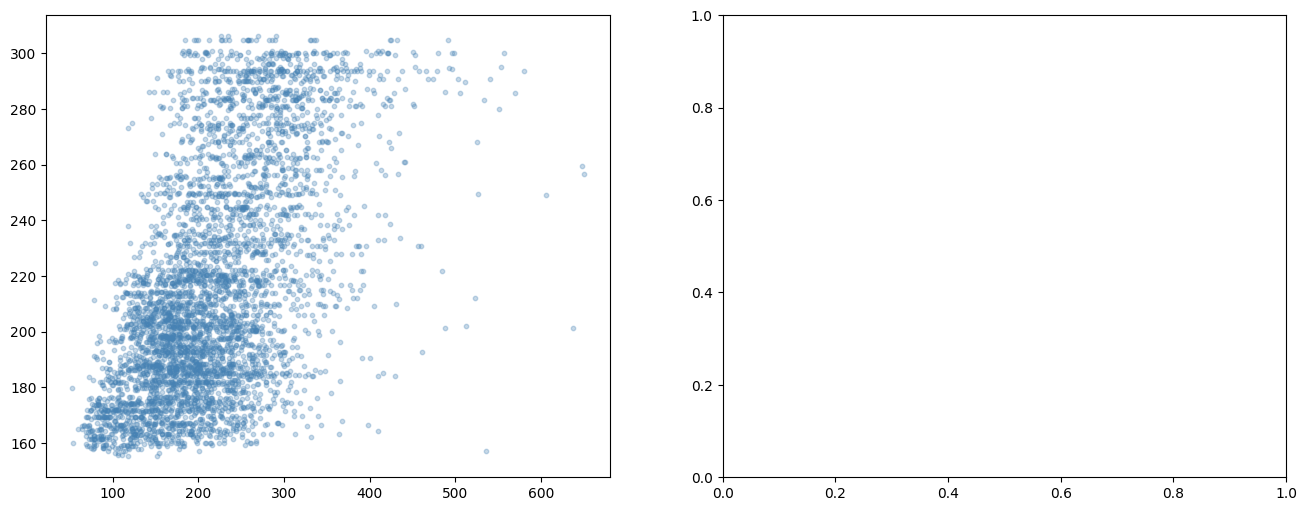

In [ ]:
# M·ª•c ƒë√≠ch: Xem model d·ª± ƒëo√°n t·ªët nh∆∞ th·∫ø n√†o

import matplotlib.pyplot as plt
import numpy as np

# L·∫•y sample ƒë·ªÉ v·∫Ω (kh√¥ng v·∫Ω h·∫øt s·∫Ω ch·∫≠m)
sample_predictions = predictions_simple.select(
    'nsmiles', 'fare', 'fare_pred'
).sample(False, 0.1, seed=42).toPandas()

# T·∫°o figure v·ªõi 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Actual vs Predicted scatter plot
axes[0].scatter(sample_predictions['fare'], sample_predictions['fare_pred'],
                alpha=0.3, s=10, color='steelblue')

# Th√™m ƒë∆∞·ªùng perfect prediction (45 degree line)
min_val = min(sample_predictions['fare'].min(), sample_predictions['fare_pred'].min())
max_val = max(sample_predictions['fare'].max(), sample_predictions['fare_pred'].max())
axes[0].plot([min_val, max_val], [min_val, max_val],
             'r--', linewidth=2, label='Perfect Prediction')

axes[0].set_xlabel('Gi√° v√© th·ª±c t·∫ø ($)', fontsize=12)
axes[0].set_ylabel('Gi√° v√© d·ª± ƒëo√°n ($)', fontsize=12)
axes[0].set_title('Actual vs Predicted Fare', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Th√™m R¬≤ l√™n plot
axes[0].text(0.05, 0.95, f'R¬≤ = {r2_simple:.4f}\nRMSE = ${rmse_simple:.2f}',
             transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Prediction by distance
axes[1].scatter(sample_predictions['nsmiles'], sample_predictions['fare'],
                alpha=0.3, s=10, color='gray', label='Actual')
axes[1].scatter(sample_predictions['nsmiles'], sample_predictions['fare_pred'],
                alpha=0.3, s=10, color='red', label='Predicted')

axes[1].set_xlabel('Kho·∫£ng c√°ch (miles)', fontsize=12)
axes[1].set_ylabel('Gi√° v√© ($)', fontsize=12)
axes[1].set_title('Fare by Distance: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../image/lr_simple_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../image/lr_simple_residuals.png'

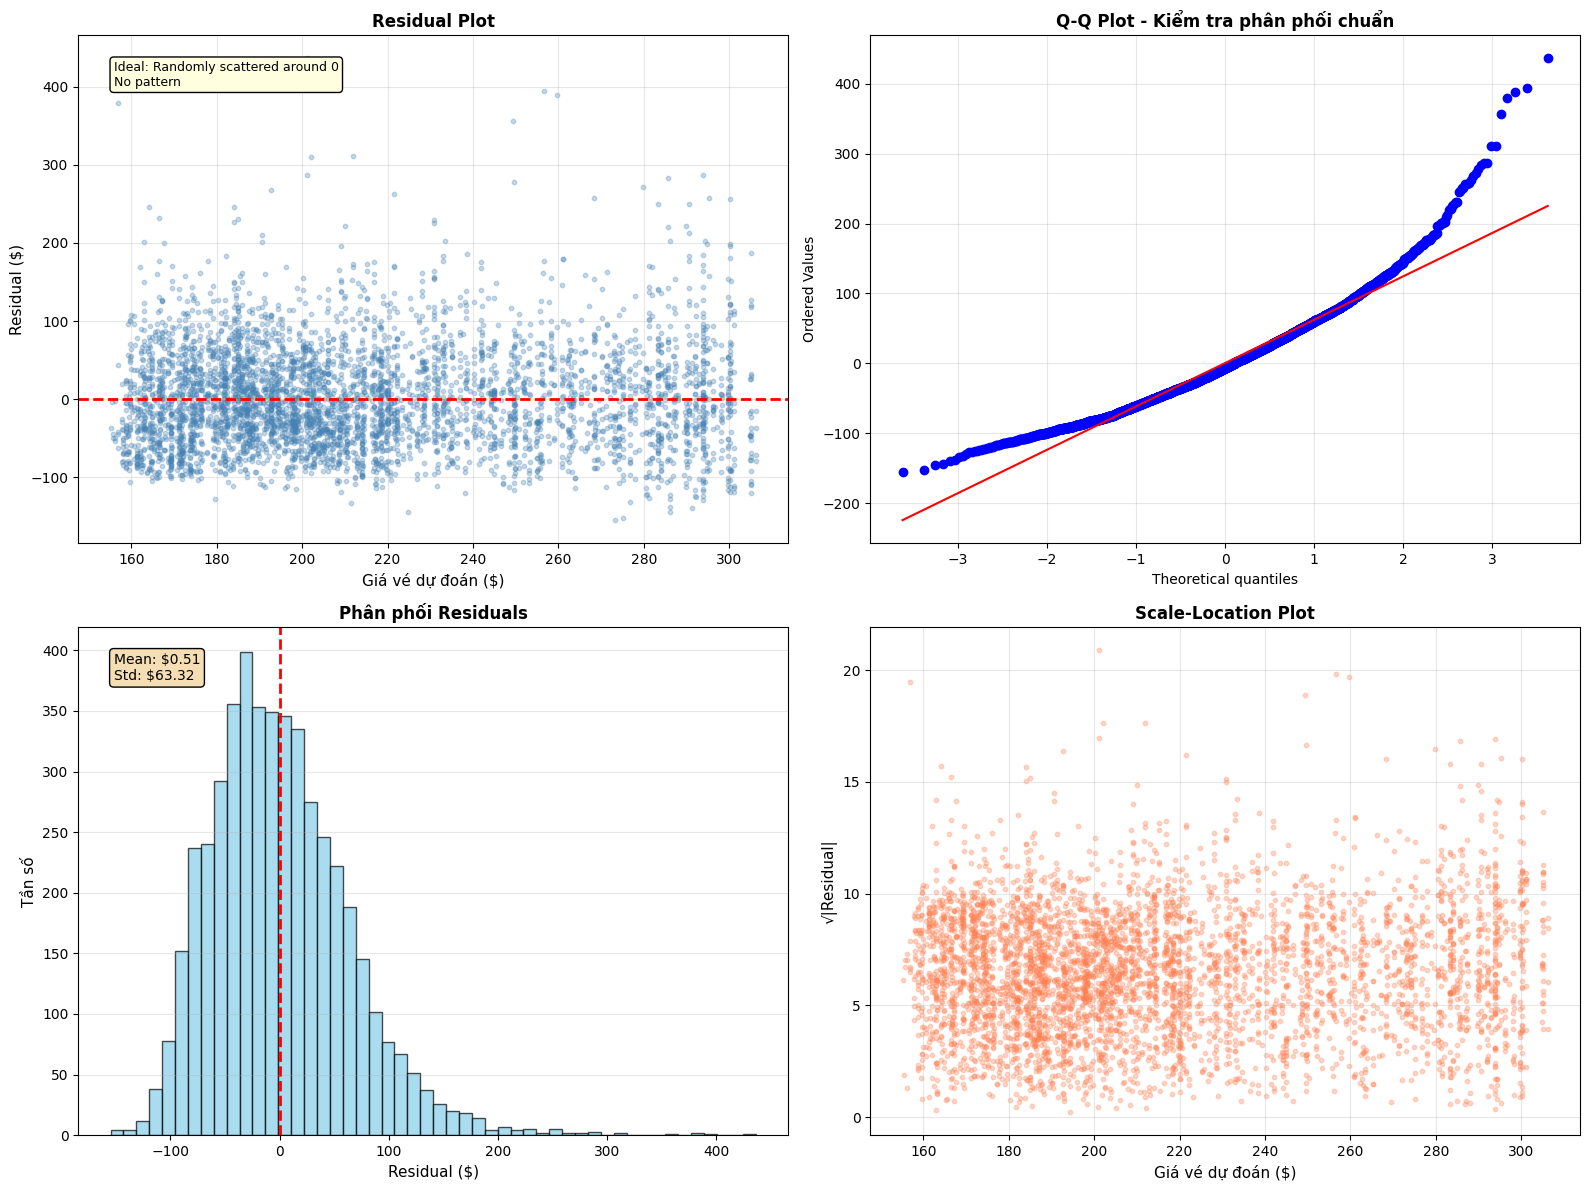

In [ ]:
# M·ª•c ƒë√≠ch: Ki·ªÉm tra assumptions c·ªßa Linear Regression

# T√≠nh residuals
sample_predictions['residual'] = sample_predictions['fare'] - sample_predictions['fare_pred']

# T·∫°o figure v·ªõi 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Residual vs Predicted (ki·ªÉm tra homoscedasticity)
axes[0, 0].scatter(sample_predictions['fare_pred'], sample_predictions['residual'],
                   alpha=0.3, s=10, color='steelblue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Gi√° v√© d·ª± ƒëo√°n ($)', fontsize=11)
axes[0, 0].set_ylabel('Residual ($)', fontsize=11)
axes[0, 0].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Th√™m note
axes[0, 0].text(0.05, 0.95, 'Ideal: Randomly scattered around 0\nNo pattern',
                transform=axes[0, 0].transAxes, fontsize=9,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow'))

# 2. Q-Q Plot (ki·ªÉm tra normality)
from scipy import stats
stats.probplot(sample_predictions['residual'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot - Ki·ªÉm tra ph√¢n ph·ªëi chu·∫©n', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram c·ªßa residuals
axes[1, 0].hist(sample_predictions['residual'], bins=50,
                edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residual ($)', fontsize=11)
axes[1, 0].set_ylabel('T·∫ßn s·ªë', fontsize=11)
axes[1, 0].set_title('Ph√¢n ph·ªëi Residuals', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Th√™m th·ªëng k√™
mean_res = sample_predictions['residual'].mean()
std_res = sample_predictions['residual'].std()
axes[1, 0].text(0.05, 0.95, f'Mean: ${mean_res:.2f}\nStd: ${std_res:.2f}',
                transform=axes[1, 0].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

# 4. Scale-Location plot (ki·ªÉm tra homoscedasticity)
sqrt_abs_residuals = np.sqrt(np.abs(sample_predictions['residual']))
axes[1, 1].scatter(sample_predictions['fare_pred'], sqrt_abs_residuals,
                   alpha=0.3, s=10, color='coral')
axes[1, 1].set_xlabel('Gi√° v√© d·ª± ƒëo√°n ($)', fontsize=11)
axes[1, 1].set_ylabel('‚àö|Residual|', fontsize=11)
axes[1, 1].set_title('Scale-Location Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../image/lr_simple_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

# Ki·ªÉm tra assumptions
print("=" * 60)
print("KI·ªÇM TRA ASSUMPTIONS C·ª¶A LINEAR REGRESSION")
print("=" * 60)

print(f"\n1. LINEARITY: Ki·ªÉm tra t·ª´ Residual Plot")
print(f"   ‚úì N·∫øu residuals ph√¢n t√°n ng·∫´u nhi√™n quanh 0 ‚Üí OK")

print(f"\n2. NORMALITY: Ki·ªÉm tra t·ª´ Q-Q Plot")
print(f"   Mean c·ªßa residuals: ${mean_res:.4f}")
print(f"   ‚úì N·∫øu mean ‚âà 0 v√† Q-Q plot g·∫ßn ƒë∆∞·ªùng th·∫≥ng ‚Üí OK")

print(f"\n3. HOMOSCEDASTICITY: Ki·ªÉm tra t·ª´ Scale-Location Plot")
print(f"   Std c·ªßa residuals: ${std_res:.2f}")
print(f"   ‚úì N·∫øu variance kh√¥ng tƒÉng theo predicted values ‚Üí OK")

print(f"\n4. INDEPENDENCE: C·∫ßn ki·ªÉm tra autocorrelation")
print(f"   (Kh√¥ng √°p d·ª•ng cho cross-sectional data n√†y)")

PH√ÇN T√çCH L·ªñI D·ª∞ ƒêO√ÅN

üìä TH·ªêNG K√ä L·ªñI:
  Mean Absolute Error:     $49.21
  Median Absolute Error:   $41.37
  Max Absolute Error:      $436.11
  Mean Percentage Error:   26.02%

üìà PH√ÇN LO·∫†I THEO M·ª®C ƒê·ªò L·ªñI:
  L·ªói th·∫•p  (<$30):   1,727 (36.6%)
  L·ªói trung b√¨nh ($30-100): 2,587 (54.8%)
  L·ªói cao   (>$100):  410 (8.7%)


/tmp/ipython-input-2709021999.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_by_distance = sample_predictions.groupby('distance_group')['abs_error'].mean()


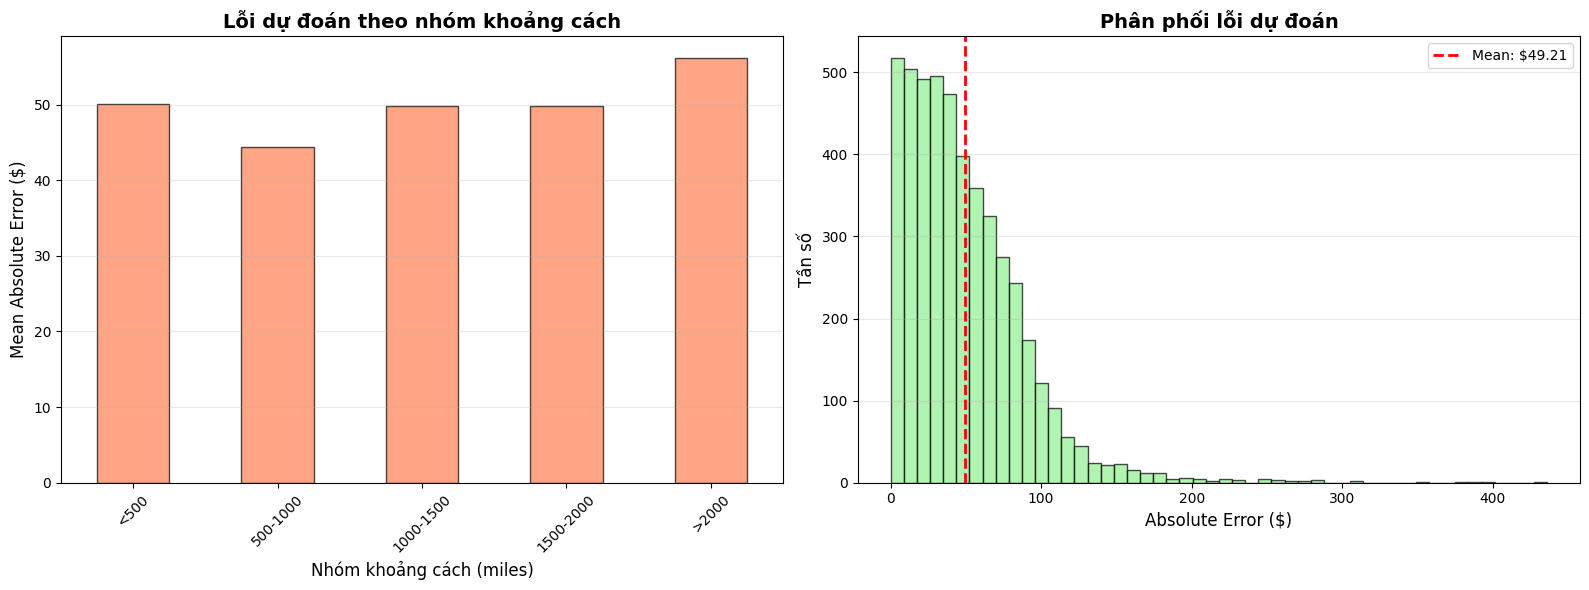


üí° NH·∫¨N X√âT:
  ‚Ä¢ Model d·ª± ƒëo√°n t·ªët nh·∫•t ·ªü kho·∫£ng c√°ch: 500-1000
  ‚Ä¢ Model d·ª± ƒëo√°n k√©m nh·∫•t ·ªü kho·∫£ng c√°ch: >2000
  ‚Ä¢ C·∫ßn th√™m features ƒë·ªÉ c·∫£i thi·ªán accuracy


In [ ]:
# M·ª•c ƒë√≠ch: Hi·ªÉu model d·ª± ƒëo√°n k√©m ·ªü nh·ªØng tr∆∞·ªùng h·ª£p n√†o

# T√≠nh absolute error
sample_predictions['abs_error'] = np.abs(sample_predictions['residual'])
sample_predictions['pct_error'] = (sample_predictions['abs_error'] / sample_predictions['fare']) * 100

# T√¨m top errors
top_errors = sample_predictions.nlargest(20, 'abs_error')

print("=" * 60)
print("PH√ÇN T√çCH L·ªñI D·ª∞ ƒêO√ÅN")
print("=" * 60)

print(f"\nüìä TH·ªêNG K√ä L·ªñI:")
print(f"  Mean Absolute Error:     ${sample_predictions['abs_error'].mean():.2f}")
print(f"  Median Absolute Error:   ${sample_predictions['abs_error'].median():.2f}")
print(f"  Max Absolute Error:      ${sample_predictions['abs_error'].max():.2f}")
print(f"  Mean Percentage Error:   {sample_predictions['pct_error'].mean():.2f}%")

# Ph√¢n lo·∫°i error levels
low_error = sample_predictions[sample_predictions['abs_error'] < 30]
medium_error = sample_predictions[(sample_predictions['abs_error'] >= 30) &
                                   (sample_predictions['abs_error'] < 100)]
high_error = sample_predictions[sample_predictions['abs_error'] >= 100]

print(f"\nüìà PH√ÇN LO·∫†I THEO M·ª®C ƒê·ªò L·ªñI:")
print(f"  L·ªói th·∫•p  (<$30):   {len(low_error):,} ({len(low_error)/len(sample_predictions)*100:.1f}%)")
print(f"  L·ªói trung b√¨nh ($30-100): {len(medium_error):,} ({len(medium_error)/len(sample_predictions)*100:.1f}%)")
print(f"  L·ªói cao   (>$100):  {len(high_error):,} ({len(high_error)/len(sample_predictions)*100:.1f}%)")

# Visualize error distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Error by distance groups
distance_bins = [0, 500, 1000, 1500, 2000, 3000]
distance_labels = ['<500', '500-1000', '1000-1500', '1500-2000', '>2000']
sample_predictions['distance_group'] = pd.cut(sample_predictions['nsmiles'],
                                               bins=distance_bins, labels=distance_labels)

error_by_distance = sample_predictions.groupby('distance_group')['abs_error'].mean()
error_by_distance.plot(kind='bar', ax=axes[0], color='coral', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Nh√≥m kho·∫£ng c√°ch (miles)', fontsize=12)
axes[0].set_ylabel('Mean Absolute Error ($)', fontsize=12)
axes[0].set_title('L·ªói d·ª± ƒëo√°n theo nh√≥m kho·∫£ng c√°ch', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Error distribution
axes[1].hist(sample_predictions['abs_error'], bins=50,
             edgecolor='black', alpha=0.7, color='lightgreen')
axes[1].axvline(x=sample_predictions['abs_error'].mean(),
                color='r', linestyle='--', linewidth=2, label=f'Mean: ${sample_predictions["abs_error"].mean():.2f}')
axes[1].set_xlabel('Absolute Error ($)', fontsize=12)
axes[1].set_ylabel('T·∫ßn s·ªë', fontsize=12)
axes[1].set_title('Ph√¢n ph·ªëi l·ªói d·ª± ƒëo√°n', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nüí° NH·∫¨N X√âT:")
print(f"  ‚Ä¢ Model d·ª± ƒëo√°n t·ªët nh·∫•t ·ªü kho·∫£ng c√°ch: {error_by_distance.idxmin()}")
print(f"  ‚Ä¢ Model d·ª± ƒëo√°n k√©m nh·∫•t ·ªü kho·∫£ng c√°ch: {error_by_distance.idxmax()}")
print(f"  ‚Ä¢ C·∫ßn th√™m features ƒë·ªÉ c·∫£i thi·ªán accuracy")

In [ ]:

# LINEAR REGRESSION - NHI·ªÄU FEATURE

print("LINEAR REGRESSION - MULTI FEATURES")

# Ch·ªçn features
feature_cols = ['nsmiles', 'quarter', 'Year', 'passengers']

print(f"\nüìã FEATURES S·ª¨ D·ª§NG:")
for i, feat in enumerate(feature_cols, 1):
    print(f"  {i}. {feat}")

# B∆∞·ªõc 1: T·∫°o feature vector
assembler_multi = VectorAssembler(
    inputCols=feature_cols,
    outputCol='features',
    handleInvalid='skip'
)

# B∆∞·ªõc 2: Chu·∫©n h√≥a features
scaler_multi = StandardScaler(
    inputCol='features',
    outputCol='scaled_features',
    withStd=True,
    withMean=True
)

# B∆∞·ªõc 3: T·∫°o Linear Regression model
lr_multi = LinearRegression(
    featuresCol='scaled_features',
    labelCol='fare',
    predictionCol='fare_pred_multi',
    maxIter=100,
    regParam=0.01,
    elasticNetParam=0.0,
    tol=1e-6
)

# B∆∞·ªõc 4: T·∫°o pipeline
pipeline_multi = Pipeline(stages=[
    assembler_multi,
    scaler_multi,
    lr_multi
])

# B∆∞·ªõc 5: Train model
print(f"\nƒêang training model v·ªõi {len(feature_cols)} features...")
model_multi = pipeline_multi.fit(train_data)
print("‚úì Training ho√†n th√†nh!")

# L∆∞u model ƒë·ªÉ d·ªÖ truy c·∫≠p
lr_multi_model = model_multi.stages[-1]

LINEAR REGRESSION - MULTI FEATURES

üìã FEATURES S·ª¨ D·ª§NG:
  1. nsmiles
  2. quarter
  3. Year
  4. passengers

ƒêang training model v·ªõi 4 features...
‚úì Training ho√†n th√†nh!


In [ ]:
# M·ª•c ƒë√≠ch: So s√°nh v·ªõi baseline model

# D·ª± ƒëo√°n tr√™n test set
predictions_multi = model_multi.transform(test_data)

# T√≠nh metrics
r2_multi = RegressionEvaluator(
    labelCol='fare', predictionCol='fare_pred_multi', metricName='r2'
).evaluate(predictions_multi)

rmse_multi = RegressionEvaluator(
    labelCol='fare', predictionCol='fare_pred_multi', metricName='rmse'
).evaluate(predictions_multi)

mae_multi = RegressionEvaluator(
    labelCol='fare', predictionCol='fare_pred_multi', metricName='mae'
).evaluate(predictions_multi)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print("=" * 70)
print("K·∫æT QU·∫¢ MULTI-FEATURE LINEAR REGRESSION")
print("=" * 70)

print(f"\nüìä HI·ªÜU SU·∫§T TR√äN TEST SET:")
print(f"  R¬≤ (R-squared):     {r2_multi:.4f}  ({r2_multi*100:.2f}%)")
print(f"  RMSE (Root MSE):    ${rmse_multi:.2f}")
print(f"  MAE (Mean Abs Err): ${mae_multi:.2f}")

# So s√°nh v·ªõi baseline
print(f"\nüìà SO S√ÅNH V·ªöI BASELINE (Distance only):")
print(f"{'Metric':<20} {'Baseline':>12} {'Multi-Feature':>15} {'Improvement':>15}")
print("-" * 65)

r2_improvement = ((r2_multi - r2_simple) / r2_simple) * 100
rmse_improvement = ((rmse_simple - rmse_multi) / rmse_simple) * 100
mae_improvement = ((mae_simple - mae_multi) / mae_simple) * 100

print(f"{'R¬≤':<20} {r2_simple:>12.4f} {r2_multi:>15.4f} {r2_improvement:>14.2f}%")
print(f"{'RMSE':<20} ${rmse_simple:>11.2f} ${rmse_multi:>14.2f} {rmse_improvement:>14.2f}%")
print(f"{'MAE':<20} ${mae_simple:>11.2f} ${mae_multi:>14.2f} {mae_improvement:>14.2f}%")

print(f"\nüí° NH·∫¨N X√âT:")
if r2_improvement > 10:
    print(f"  ‚úÖ C·∫¢I THI·ªÜN ƒê√ÅNG K·ªÇ: R¬≤ tƒÉng {r2_improvement:.1f}%")
    print(f"  ‚úÖ Model gi·∫£i th√≠ch th√™m ƒë∆∞·ª£c {(r2_multi - r2_simple)*100:.1f}% variance")
elif r2_improvement > 5:
    print(f"  ‚ö†Ô∏è  C·∫£i thi·ªán v·ª´a ph·∫£i: R¬≤ tƒÉng {r2_improvement:.1f}%")
else:
    print(f"  ‚ùå C·∫£i thi·ªán √≠t: R¬≤ ch·ªâ tƒÉng {r2_improvement:.1f}%")

print(f"  ‚Ä¢ Variance explained: {r2_simple*100:.1f}% ‚Üí {r2_multi*100:.1f}%")
print(f"  ‚Ä¢ Sai s·ªë gi·∫£m: ${rmse_simple:.2f} ‚Üí ${rmse_multi:.2f}")

K·∫æT QU·∫¢ MULTI-FEATURE LINEAR REGRESSION

üìä HI·ªÜU SU·∫§T TR√äN TEST SET:
  R¬≤ (R-squared):     0.3535  (35.35%)
  RMSE (Root MSE):    $59.56
  MAE (Mean Abs Err): $45.94

üìà SO S√ÅNH V·ªöI BASELINE (Distance only):
Metric                   Baseline   Multi-Feature     Improvement
-----------------------------------------------------------------
R¬≤                         0.3049          0.3535          15.93%
RMSE                 $      61.76 $         59.56           3.56%
MAE                  $      48.45 $         45.94           5.18%

üí° NH·∫¨N X√âT:
  ‚úÖ C·∫¢I THI·ªÜN ƒê√ÅNG K·ªÇ: R¬≤ tƒÉng 15.9%
  ‚úÖ Model gi·∫£i th√≠ch th√™m ƒë∆∞·ª£c 4.9% variance
  ‚Ä¢ Variance explained: 30.5% ‚Üí 35.4%
  ‚Ä¢ Sai s·ªë gi·∫£m: $61.76 ‚Üí $59.56


In [ ]:
# ============================================================
# CELL 7A: POLYNOMIAL REGRESSION - B·∫¨C 2
# ============================================================
# M·ª•c ƒë√≠ch: Th√™m c√°c polynomial terms ƒë·ªÉ capture non-linearity

from pyspark.ml.feature import PolynomialExpansion

print("=" * 70)
print("POLYNOMIAL REGRESSION - B·∫¨C 2")
print("=" * 70)

# B∆∞·ªõc 1: T·∫°o feature vector
assembler_poly = VectorAssembler(
    inputCols=['nsmiles', 'quarter', 'Year', 'passengers'],
    outputCol='features',
    handleInvalid='skip'
)

# B∆∞·ªõc 2: Chu·∫©n h√≥a tr∆∞·ªõc khi polynomial expansion (quan tr·ªçng!)
scaler_poly = StandardScaler(
    inputCol='features',
    outputCol='scaled_features',
    withStd=True,
    withMean=True
)

# B∆∞·ªõc 3: Polynomial expansion (degree=2)
# T·∫°o c√°c terms: x1, x2, x1¬≤, x2¬≤, x1√óx2, ...
poly_expansion = PolynomialExpansion(
    degree=2,  # B·∫≠c 2
    inputCol='scaled_features',
    outputCol='poly_features'
)

print(f"\nüìê POLYNOMIAL FEATURES:")
print(f"  ‚Ä¢ Input features: 4 (nsmiles, quarter, Year, passengers)")
print(f"  ‚Ä¢ Polynomial degree: 2")
print(f"  ‚Ä¢ Output features: {(4+2)*(4+1)//2} = 15")
print(f"    (bao g·ªìm: x1, x2, x3, x4, x1¬≤, x2¬≤, x3¬≤, x4¬≤, x1√óx2, x1√óx3, ...)")

# B∆∞·ªõc 4: Linear Regression v·ªõi polynomial features
lr_poly = LinearRegression(
    featuresCol='poly_features',
    labelCol='fare',
    predictionCol='fare_pred_poly',
    maxIter=100,
    regParam=0.1,  # TƒÉng regularization ƒë·ªÉ tr√°nh overfitting
    elasticNetParam=0.0,
    tol=1e-6
)

# B∆∞·ªõc 5: T·∫°o pipeline
pipeline_poly = Pipeline(stages=[
    assembler_poly,
    scaler_poly,
    poly_expansion,
    lr_poly
])

# B∆∞·ªõc 6: Train model
print(f"\nƒêang training Polynomial Regression...")
model_poly = pipeline_poly.fit(train_data)
print("‚úì Training ho√†n th√†nh!")

lr_poly_model = model_poly.stages[-1]

POLYNOMIAL REGRESSION - B·∫¨C 2

üìê POLYNOMIAL FEATURES:
  ‚Ä¢ Input features: 4 (nsmiles, quarter, Year, passengers)
  ‚Ä¢ Polynomial degree: 2
  ‚Ä¢ Output features: 15 = 15
    (bao g·ªìm: x1, x2, x3, x4, x1¬≤, x2¬≤, x3¬≤, x4¬≤, x1√óx2, x1√óx3, ...)

ƒêang training Polynomial Regression...
‚úì Training ho√†n th√†nh!


In [ ]:
# M·ª•c ƒë√≠ch: So s√°nh v·ªõi Linear models

# D·ª± ƒëo√°n
predictions_poly = model_poly.transform(test_data)

# T√≠nh metrics
r2_poly = RegressionEvaluator(
    labelCol='fare', predictionCol='fare_pred_poly', metricName='r2'
).evaluate(predictions_poly)

rmse_poly = RegressionEvaluator(
    labelCol='fare', predictionCol='fare_pred_poly', metricName='rmse'
).evaluate(predictions_poly)

mae_poly = RegressionEvaluator(
    labelCol='fare', predictionCol='fare_pred_poly', metricName='mae'
).evaluate(predictions_poly)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print("=" * 70)
print("K·∫æT QU·∫¢ POLYNOMIAL REGRESSION (B·∫≠c 2)")
print("=" * 70)

print(f"\nüìä HI·ªÜU SU·∫§T TR√äN TEST SET:")
print(f"  R¬≤ (R-squared):     {r2_poly:.4f}  ({r2_poly*100:.2f}%)")
print(f"  RMSE (Root MSE):    ${rmse_poly:.2f}")
print(f"  MAE (Mean Abs Err): ${mae_poly:.2f}")

# So s√°nh 3 models
print(f"\nüìà SO S√ÅNH 3 MODELS:")
print(f"{'Model':<30} {'R¬≤':>12} {'RMSE':>12} {'MAE':>12} {'Features':>10}")
print("-" * 80)
print(f"{'1. Linear (Distance only)':<30} {r2_simple:>12.4f} ${rmse_simple:>11.2f} ${mae_simple:>11.2f} {'1':>10}")
print(f"{'2. Linear (Multi-feature)':<30} {r2_multi:>12.4f} ${rmse_multi:>11.2f} ${mae_multi:>11.2f} {'4':>10}")
print(f"{'3. Polynomial (Degree 2)':<30} {r2_poly:>12.4f} ${rmse_poly:>11.2f} ${mae_poly:>11.2f} {'15':>10}")

# T√≠nh improvement
poly_vs_linear = ((r2_poly - r2_multi) / r2_multi) * 100
poly_vs_baseline = ((r2_poly - r2_simple) / r2_simple) * 100

print(f"\nüí° C·∫¢I THI·ªÜN:")
print(f"  ‚Ä¢ Polynomial vs Linear Multi-feature: +{poly_vs_linear:.2f}%")
print(f"  ‚Ä¢ Polynomial vs Baseline: +{poly_vs_baseline:.2f}%")

if r2_poly > r2_multi:
    print(f"\n  ‚úÖ Polynomial t·ªët h∆°n Linear Multi-feature")
    print(f"  ‚úÖ Phi tuy·∫øn t√≠nh capture ƒë∆∞·ª£c patterns t·ªët h∆°n")
else:
    print(f"\n  ‚ö†Ô∏è  Polynomial kh√¥ng c·∫£i thi·ªán nhi·ªÅu")
    print(f"  ‚ö†Ô∏è  C√≥ th·ªÉ c·∫ßn degree cao h∆°n ho·∫∑c model kh√°c")

K·∫æT QU·∫¢ POLYNOMIAL REGRESSION (B·∫≠c 2)

üìä HI·ªÜU SU·∫§T TR√äN TEST SET:
  R¬≤ (R-squared):     0.3729  (37.29%)
  RMSE (Root MSE):    $58.66
  MAE (Mean Abs Err): $44.95

üìà SO S√ÅNH 3 MODELS:
Model                                    R¬≤         RMSE          MAE   Features
--------------------------------------------------------------------------------
1. Linear (Distance only)            0.3049 $      61.76 $      48.45          1
2. Linear (Multi-feature)            0.3535 $      59.56 $      45.94          4
3. Polynomial (Degree 2)             0.3729 $      58.66 $      44.95         15

üí° C·∫¢I THI·ªÜN:
  ‚Ä¢ Polynomial vs Linear Multi-feature: +5.49%
  ‚Ä¢ Polynomial vs Baseline: +22.30%

  ‚úÖ Polynomial t·ªët h∆°n Linear Multi-feature
  ‚úÖ Phi tuy·∫øn t√≠nh capture ƒë∆∞·ª£c patterns t·ªët h∆°n


In [ ]:
# ============================================================
# CELL 7C: TH·ª¨ NGHI·ªÜM NHI·ªÄU POLYNOMIAL DEGREES
# ============================================================
# M·ª•c ƒë√≠ch: T√¨m degree t·ªëi ∆∞u, ki·ªÉm tra overfitting

print("=" * 70)
print("TH·ª¨ NGHI·ªÜM NHI·ªÄU POLYNOMIAL DEGREES")
print("=" * 70)

degrees = [1, 2, 3, 4]
results = []

for degree in degrees:
    print(f"\nƒêang train v·ªõi degree = {degree}...")

    # T·∫°o pipeline cho degree n√†y
    poly_exp = PolynomialExpansion(
        degree=degree,
        inputCol='scaled_features',
        outputCol='poly_features'
    )

    lr_temp = LinearRegression(
        featuresCol='poly_features',
        labelCol='fare',
        predictionCol='fare_pred',
        maxIter=100,
        regParam=0.1,
        elasticNetParam=0.0
    )

    pipeline_temp = Pipeline(stages=[
        assembler_poly,
        scaler_poly,
        poly_exp,
        lr_temp
    ])

    # Train
    model_temp = pipeline_temp.fit(train_data)

    # Evaluate tr√™n c·∫£ train v√† test
    pred_train = model_temp.transform(train_data)
    pred_test = model_temp.transform(test_data)

    r2_train = RegressionEvaluator(
        labelCol='fare', predictionCol='fare_pred', metricName='r2'
    ).evaluate(pred_train)

    r2_test = RegressionEvaluator(
        labelCol='fare', predictionCol='fare_pred', metricName='r2'
    ).evaluate(pred_test)

    rmse_train = RegressionEvaluator(
        labelCol='fare', predictionCol='fare_pred', metricName='rmse'
    ).evaluate(pred_train)

    rmse_test = RegressionEvaluator(
        labelCol='fare', predictionCol='fare_pred', metricName='rmse'
    ).evaluate(pred_test)

    # T√≠nh s·ªë features
    num_features = pred_test.select('poly_features').first()[0].size

    results.append({
        'Degree': degree,
        'Num_Features': num_features,
        'R2_Train': r2_train,
        'R2_Test': r2_test,
        'RMSE_Train': rmse_train,
        'RMSE_Test': rmse_test,
        'Overfit_Gap': r2_train - r2_test
    })

    print(f"  ‚úì Degree {degree}: R¬≤ Train={r2_train:.4f}, Test={r2_test:.4f}, Gap={r2_train-r2_test:.4f}")

# T·∫°o DataFrame
results_df = pd.DataFrame(results)

print(f"\n" + "=" * 70)
print("K·∫æT QU·∫¢ T·ªîNG H·ª¢P")
print("=" * 70)
print(results_df.to_string(index=False))

# T√¨m degree t·ªët nh·∫•t
best_degree_idx = results_df['R2_Test'].idxmax()
best_degree = results_df.loc[best_degree_idx, 'Degree']
best_r2 = results_df.loc[best_degree_idx, 'R2_Test']

print(f"\nüèÜ DEGREE T·ªêI ∆ØU: {int(best_degree)}")
print(f"  ‚Ä¢ R¬≤ Test: {best_r2:.4f}")
print(f"  ‚Ä¢ Overfitting gap: {results_df.loc[best_degree_idx, 'Overfit_Gap']:.4f}")

TH·ª¨ NGHI·ªÜM NHI·ªÄU POLYNOMIAL DEGREES

ƒêang train v·ªõi degree = 1...
  ‚úì Degree 1: R¬≤ Train=0.3490, Test=0.3535, Gap=-0.0045

ƒêang train v·ªõi degree = 2...
  ‚úì Degree 2: R¬≤ Train=0.3702, Test=0.3729, Gap=-0.0028

ƒêang train v·ªõi degree = 3...
  ‚úì Degree 3: R¬≤ Train=0.3959, Test=0.3957, Gap=0.0002

ƒêang train v·ªõi degree = 4...
  ‚úì Degree 4: R¬≤ Train=0.4041, Test=0.4042, Gap=-0.0000

K·∫æT QU·∫¢ T·ªîNG H·ª¢P
 Degree  Num_Features  R2_Train  R2_Test  RMSE_Train  RMSE_Test  Overfit_Gap
      1             4  0.349008 0.353508   60.001665  59.562801    -0.004499
      2            14  0.370176 0.372927   59.018086  58.661429    -0.002750
      3            34  0.395862 0.395705   57.802128  57.586128     0.000156
      4            69  0.404108 0.404155   57.406281  57.182091    -0.000047

üèÜ DEGREE T·ªêI ∆ØU: 4
  ‚Ä¢ R¬≤ Test: 0.4042
  ‚Ä¢ Overfitting gap: -0.0000


FileNotFoundError: [Errno 2] No such file or directory: '../image/polynomial_degree_comparison.png'

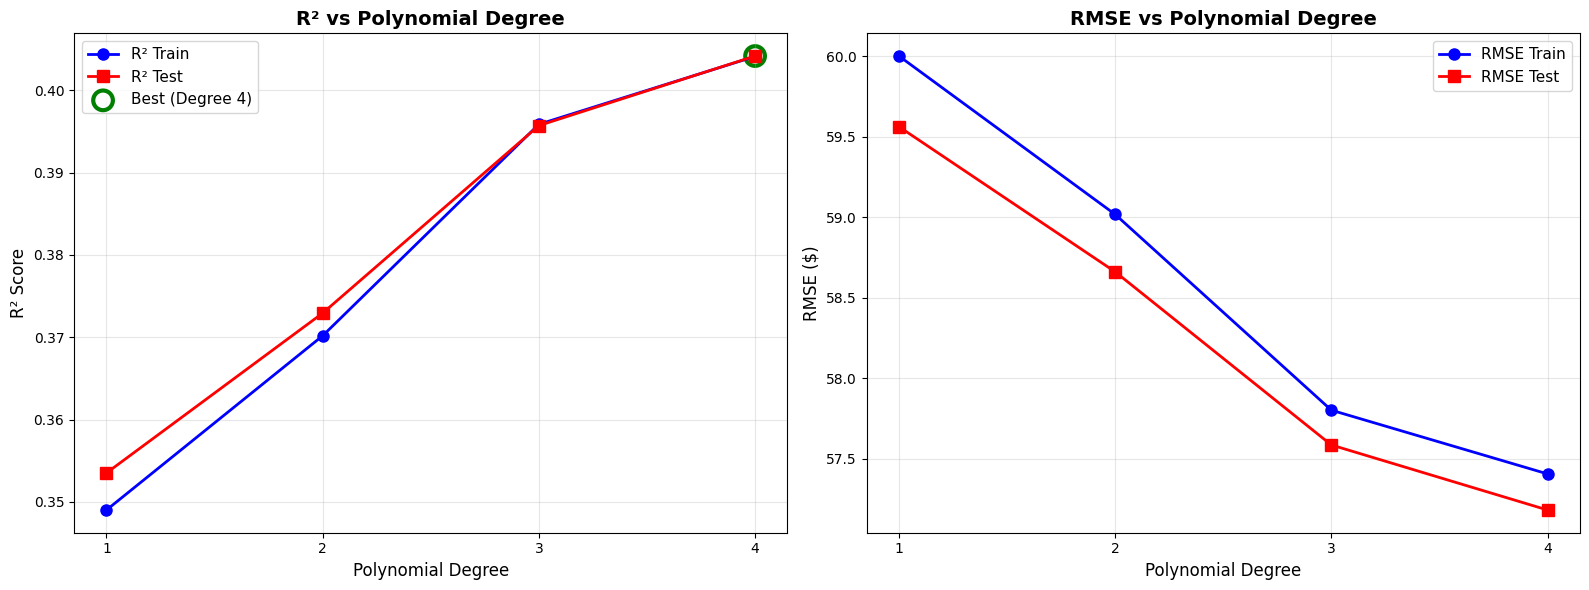

In [ ]:
# M·ª•c ƒë√≠ch: Xem xu h∆∞·ªõng overfitting

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. R¬≤ comparison: Train vs Test
axes[0].plot(results_df['Degree'], results_df['R2_Train'],
             marker='o', linewidth=2, markersize=8, label='R¬≤ Train', color='blue')
axes[0].plot(results_df['Degree'], results_df['R2_Test'],
             marker='s', linewidth=2, markersize=8, label='R¬≤ Test', color='red')
axes[0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0].set_ylabel('R¬≤ Score', fontsize=12)
axes[0].set_title('R¬≤ vs Polynomial Degree', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(results_df['Degree'])

# Highlight best degree
best_idx = results_df['R2_Test'].idxmax()
axes[0].scatter(results_df.loc[best_idx, 'Degree'],
                results_df.loc[best_idx, 'R2_Test'],
                s=200, facecolors='none', edgecolors='green', linewidths=3,
                label=f'Best (Degree {int(results_df.loc[best_idx, "Degree"])})')
axes[0].legend(fontsize=11)

# 2. RMSE comparison: Train vs Test
axes[1].plot(results_df['Degree'], results_df['RMSE_Train'],
             marker='o', linewidth=2, markersize=8, label='RMSE Train', color='blue')
axes[1].plot(results_df['Degree'], results_df['RMSE_Test'],
             marker='s', linewidth=2, markersize=8, label='RMSE Test', color='red')
axes[1].set_xlabel('Polynomial Degree', fontsize=12)
axes[1].set_ylabel('RMSE ($)', fontsize=12)
axes[1].set_title('RMSE vs Polynomial Degree', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(results_df['Degree'])

plt.tight_layout()
plt.savefig('../image/polynomial_degree_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Ph√¢n t√≠ch overfitting
print("\n" + "=" * 70)
print("PH√ÇN T√çCH OVERFITTING")
print("=" * 70)

for _, row in results_df.iterrows():
    gap = row['Overfit_Gap']
    degree = int(row['Degree'])

    if gap < 0.01:
        status = "‚úÖ GOOD - Kh√¥ng overfitting"
    elif gap < 0.03:
        status = "‚ö†Ô∏è  WARNING - Overfitting nh·∫π"
    else:
        status = "‚ùå BAD - Overfitting nghi√™m tr·ªçng"

    print(f"  Degree {degree}: Gap = {gap:.4f} ‚Üí {status}")

print(f"\nüí° KHUY·∫æN NGH·ªä:")
if results_df.loc[best_idx, 'Overfit_Gap'] < 0.02:
    print(f"  ‚úÖ S·ª≠ d·ª•ng Polynomial Degree {int(best_degree)}")
    print(f"  ‚úÖ C√¢n b·∫±ng t·ªët gi·ªØa performance v√† generalization")
else:
    print(f"  ‚ö†Ô∏è  Degree {int(best_degree)} c√≥ overfitting")
    print(f"  ‚ö†Ô∏è  C√¢n nh·∫Øc d√πng regularization m·∫°nh h∆°n ho·∫∑c degree th·∫•p h∆°n")

SO S√ÅNH TO√ÄN DI·ªÜN - T·∫§T C·∫¢ MODELS

                Model       R¬≤      RMSE  Num_Features Complexity
  Baseline (Distance) 0.304939 61.759668             1        Low
 Linear Multi-feature 0.353507 59.562858             4     Medium
Polynomial (Degree 4) 0.404155 57.182091            69       High


FileNotFoundError: [Errno 2] No such file or directory: '../image/final_model_comparison.png'

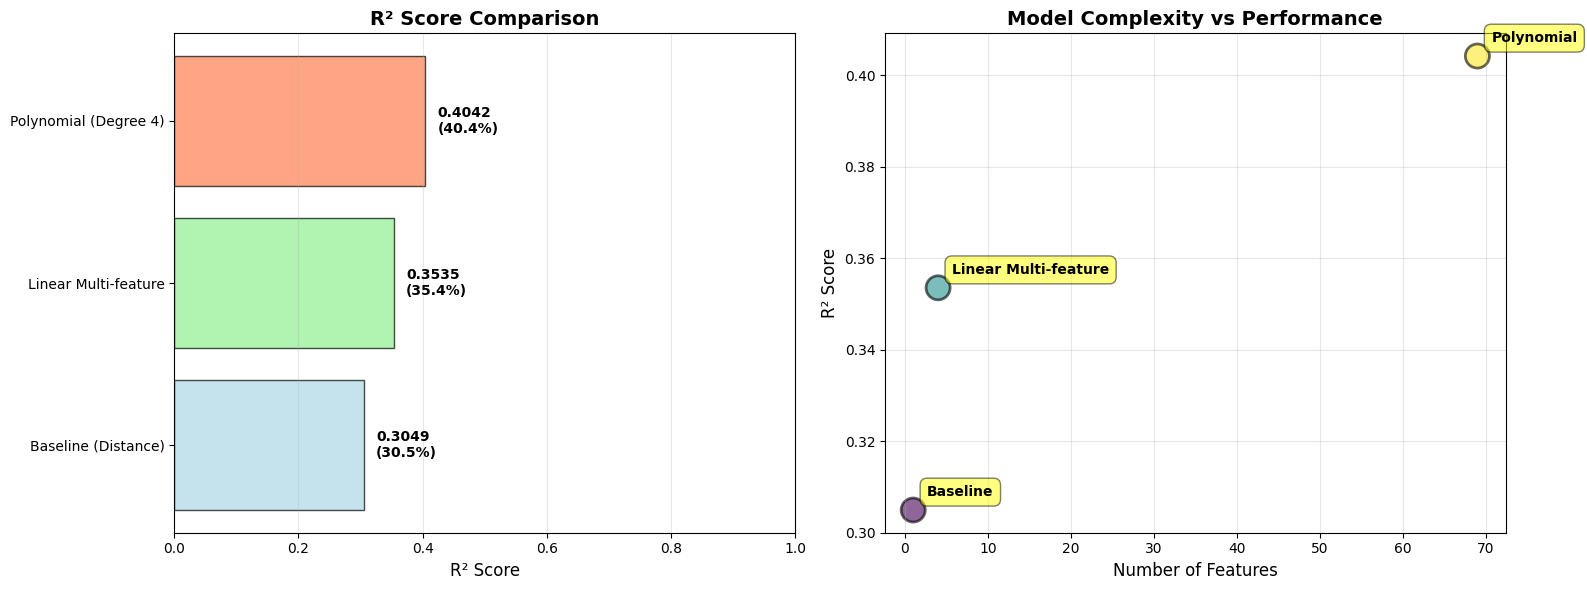

In [ ]:
# ============================================================
# CELL 7E: SO S√ÅNH CU·ªêI C√ôNG - T·∫§T C·∫¢ MODELS
# ============================================================
# M·ª•c ƒë√≠ch: Quy·∫øt ƒë·ªãnh model n√†o t·ªët nh·∫•t

# T·ªïng h·ª£p t·∫•t c·∫£ k·∫øt qu·∫£
final_comparison = pd.DataFrame({
    'Model': [
        'Baseline (Distance)',
        'Linear Multi-feature',
        f'Polynomial (Degree {int(best_degree)})'
    ],
    'R¬≤': [r2_simple, r2_multi, best_r2],
    'RMSE': [rmse_simple, rmse_multi, results_df.loc[best_idx, 'RMSE_Test']],
    'Num_Features': [1, 4, int(results_df.loc[best_idx, 'Num_Features'])],
    'Complexity': ['Low', 'Medium', 'High']
})

print("=" * 70)
print("SO S√ÅNH TO√ÄN DI·ªÜN - T·∫§T C·∫¢ MODELS")
print("=" * 70)
print()
print(final_comparison.to_string(index=False))

# Visualize final comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. R¬≤ comparison
models = final_comparison['Model']
r2_values = final_comparison['R¬≤']
colors = ['lightblue', 'lightgreen', 'coral']

bars = axes[0].barh(models, r2_values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('R¬≤ Score', fontsize=12)
axes[0].set_title('R¬≤ Score Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].grid(True, alpha=0.3, axis='x')

for bar, val in zip(bars, r2_values):
    width = bar.get_width()
    axes[0].text(width + 0.02, bar.get_y() + bar.get_height()/2,
                 f'{val:.4f}\n({val*100:.1f}%)',
                 ha='left', va='center', fontweight='bold', fontsize=10)

# 2. Complexity vs Performance
axes[1].scatter(final_comparison['Num_Features'], final_comparison['R¬≤'],
                s=300, c=range(len(final_comparison)), cmap='viridis',
                alpha=0.6, edgecolors='black', linewidths=2)

for i, row in final_comparison.iterrows():
    axes[1].annotate(row['Model'].split('(')[0].strip(),
                     (row['Num_Features'], row['R¬≤']),
                     xytext=(10, 10), textcoords='offset points',
                     fontsize=10, fontweight='bold',
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5))

axes[1].set_xlabel('Number of Features', fontsize=12)
axes[1].set_ylabel('R¬≤ Score', fontsize=12)
axes[1].set_title('Model Complexity vs Performance', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../image/final_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# K·∫øt lu·∫≠n v√† ƒë·ªÅ xu·∫•t
print("\n" + "=" * 70)
print("K·∫æT LU·∫¨N V√Ä KHUY·∫æN NGH·ªä")
print("=" * 70)

best_model_idx = final_comparison['R¬≤'].idxmax()
best_model_name = final_comparison.loc[best_model_idx, 'Model']
best_model_r2 = final_comparison.loc[best_model_idx, 'R¬≤']

print(f"\nüèÜ MODEL T·ªêT NH·∫§T: {best_model_name}")
print(f"  ‚Ä¢ R¬≤: {best_model_r2:.4f} ({best_model_r2*100:.1f}% variance explained)")
print(f"  ‚Ä¢ RMSE: ${final_comparison.loc[best_model_idx, "RMSE"]:.2f}")

print(f"\nüìä SO S√ÅNH:")
baseline_r2 = final_comparison.loc[0, 'R¬≤']
improvement = ((best_model_r2 - baseline_r2) / baseline_r2) * 100
print(f"  ‚Ä¢ C·∫£i thi·ªán so v·ªõi baseline: +{improvement:.1f}%")
print(f"  ‚Ä¢ Variance explained tƒÉng: {baseline_r2*100:.1f}% ‚Üí {best_model_r2*100:.1f}%")

print(f"\nüí≠ ƒê√ÅNH GI√Å:")
if best_model_r2 < 0.4:
    print(f"  ‚ö†Ô∏è  R¬≤ v·∫´n th·∫•p (<40%), c·∫ßn:")
    print(f"     ‚Ä¢ Th√™m nhi·ªÅu features h∆°n (carrier, competition, seasonality)")
    print(f"     ‚Ä¢ Th·ª≠ m√¥ h√¨nh phi tuy·∫øn m·∫°nh h∆°n (Random Forest, Gradient Boosting)")
    print(f"     ‚Ä¢ Feature engineering (interaction terms, categorical encoding)")
elif best_model_r2 < 0.6:
    print(f"  ‚úÖ R¬≤ ·ªü m·ª©c ch·∫•p nh·∫≠n ƒë∆∞·ª£c (40-60%)")
    print(f"  ‚úÖ Model c√≥ th·ªÉ d√πng ƒë∆∞·ª£c nh∆∞ng v·∫´n c√≥ th·ªÉ c·∫£i thi·ªán")
else:
    print(f"  ‚úÖ‚úÖ R¬≤ t·ªët (>60%)")
    print(f"  ‚úÖ‚úÖ Model r·∫•t ƒë√°ng tin c·∫≠y")

print(f"\nüöÄ B∆Ø·ªöC TI·∫æP THEO:")
print(f"  1. Th·ª≠ Random Forest (capture non-linearity t·ªët h∆°n)")
print(f"  2. Feature engineering: th√™m carrier_type, route_category")
print(f"  3. Ensemble methods: XGBoost, LightGBM")
print(f"  4. Hyperparameter tuning v·ªõi Grid Search")

In [ ]:
# ============================================================
# PH√ÅT HI·ªÜN B·∫§T TH∆Ø·ªúNG TRONG GIAI ƒêO·∫†N COVID-19
# ============================================================
# M·ª•c ƒë√≠ch: Ph√¢n t√≠ch ·∫£nh h∆∞·ªüng c·ªßa COVID-19 l√™n ng√†nh h√†ng kh√¥ng

print("PH√ÅT HI·ªÜN B·∫§T TH∆Ø·ªúNG: ·∫¢NH H∆Ø·ªûNG COVID-19")

# ƒê·ªãnh nghƒ©a c√°c giai ƒëo·∫°n
pre_covid = (1993, 2019)
covid_period = (2020, 2021)
post_covid = (2022, 2024)

print(f"\nüìÖ PH√ÇN CHIA GIAI ƒêO·∫†N:")
print(f"  ‚Ä¢ Pre-COVID:  {pre_covid[0]}-{pre_covid[1]} (27 nƒÉm)")
print(f"  ‚Ä¢ COVID:      {covid_period[0]}-{covid_period[1]} (2 nƒÉm)")
print(f"  ‚Ä¢ Post-COVID: {post_covid[0]}-{post_covid[1]} (3 nƒÉm)")

# G√°n nh√£n giai ƒëo·∫°n
from pyspark.sql.functions import when, col, count, avg, sum

df_with_period = df.withColumn('period',
    when((col('Year') >= pre_covid[0]) & (col('Year') <= pre_covid[1]), 'Pre-COVID')
    .when((col('Year') >= covid_period[0]) & (col('Year') <= covid_period[1]), 'COVID')
    .when((col('Year') >= post_covid[0]) & (col('Year') <= post_covid[1]), 'Post-COVID')
    .otherwise('Unknown')
)

# Th·ªëng k√™ theo nƒÉm
yearly_stats = df.groupBy('Year').agg(
    count('*').alias('num_routes'),
    avg('fare').alias('avg_fare'),
    sum('passengers').alias('total_passengers'),
    avg('passengers').alias('avg_passengers'),
    avg('nsmiles').alias('avg_distance')
).orderBy('Year').toPandas()

# Th√™m period labels
yearly_stats['period'] = yearly_stats['Year'].apply(
    lambda x: 'Pre-COVID' if x <= 2019
    else ('COVID' if x <= 2021 else 'Post-COVID')
)

print("\nüìä D·ªÆ LI·ªÜU THEO NƒÇM:")
print(yearly_stats.tail(10).to_string(index=False))  # 10 nƒÉm g·∫ßn nh·∫•t

PH√ÅT HI·ªÜN B·∫§T TH∆Ø·ªúNG: ·∫¢NH H∆Ø·ªûNG COVID-19

üìÖ PH√ÇN CHIA GIAI ƒêO·∫†N:
  ‚Ä¢ Pre-COVID:  1993-2019 (27 nƒÉm)
  ‚Ä¢ COVID:      2020-2021 (2 nƒÉm)
  ‚Ä¢ Post-COVID: 2022-2024 (3 nƒÉm)

üìä D·ªÆ LI·ªÜU THEO NƒÇM:
 Year  num_routes   avg_fare  total_passengers  avg_passengers  avg_distance     period
 2015        8150 247.992015           2845538      349.145767   1200.745767  Pre-COVID
 2016        8227 240.550512           2977255      361.888295   1201.169928  Pre-COVID
 2017        8232 240.096521           3086637      374.955904   1196.532313  Pre-COVID
 2018        8195 239.809121           3203950      390.964002   1197.654790  Pre-COVID
 2019        8148 241.179140           3262326      400.383652   1193.206186  Pre-COVID
 2020        7520 193.615156           1131511      150.466888   1233.886835      COVID
 2021        7758 206.346408           2133402      274.993813   1208.319799      COVID
 2022        7809 249.667511           2979369      381.530158   1187.

FileNotFoundError: [Errno 2] No such file or directory: '../image/covid_impact_timeline.png'

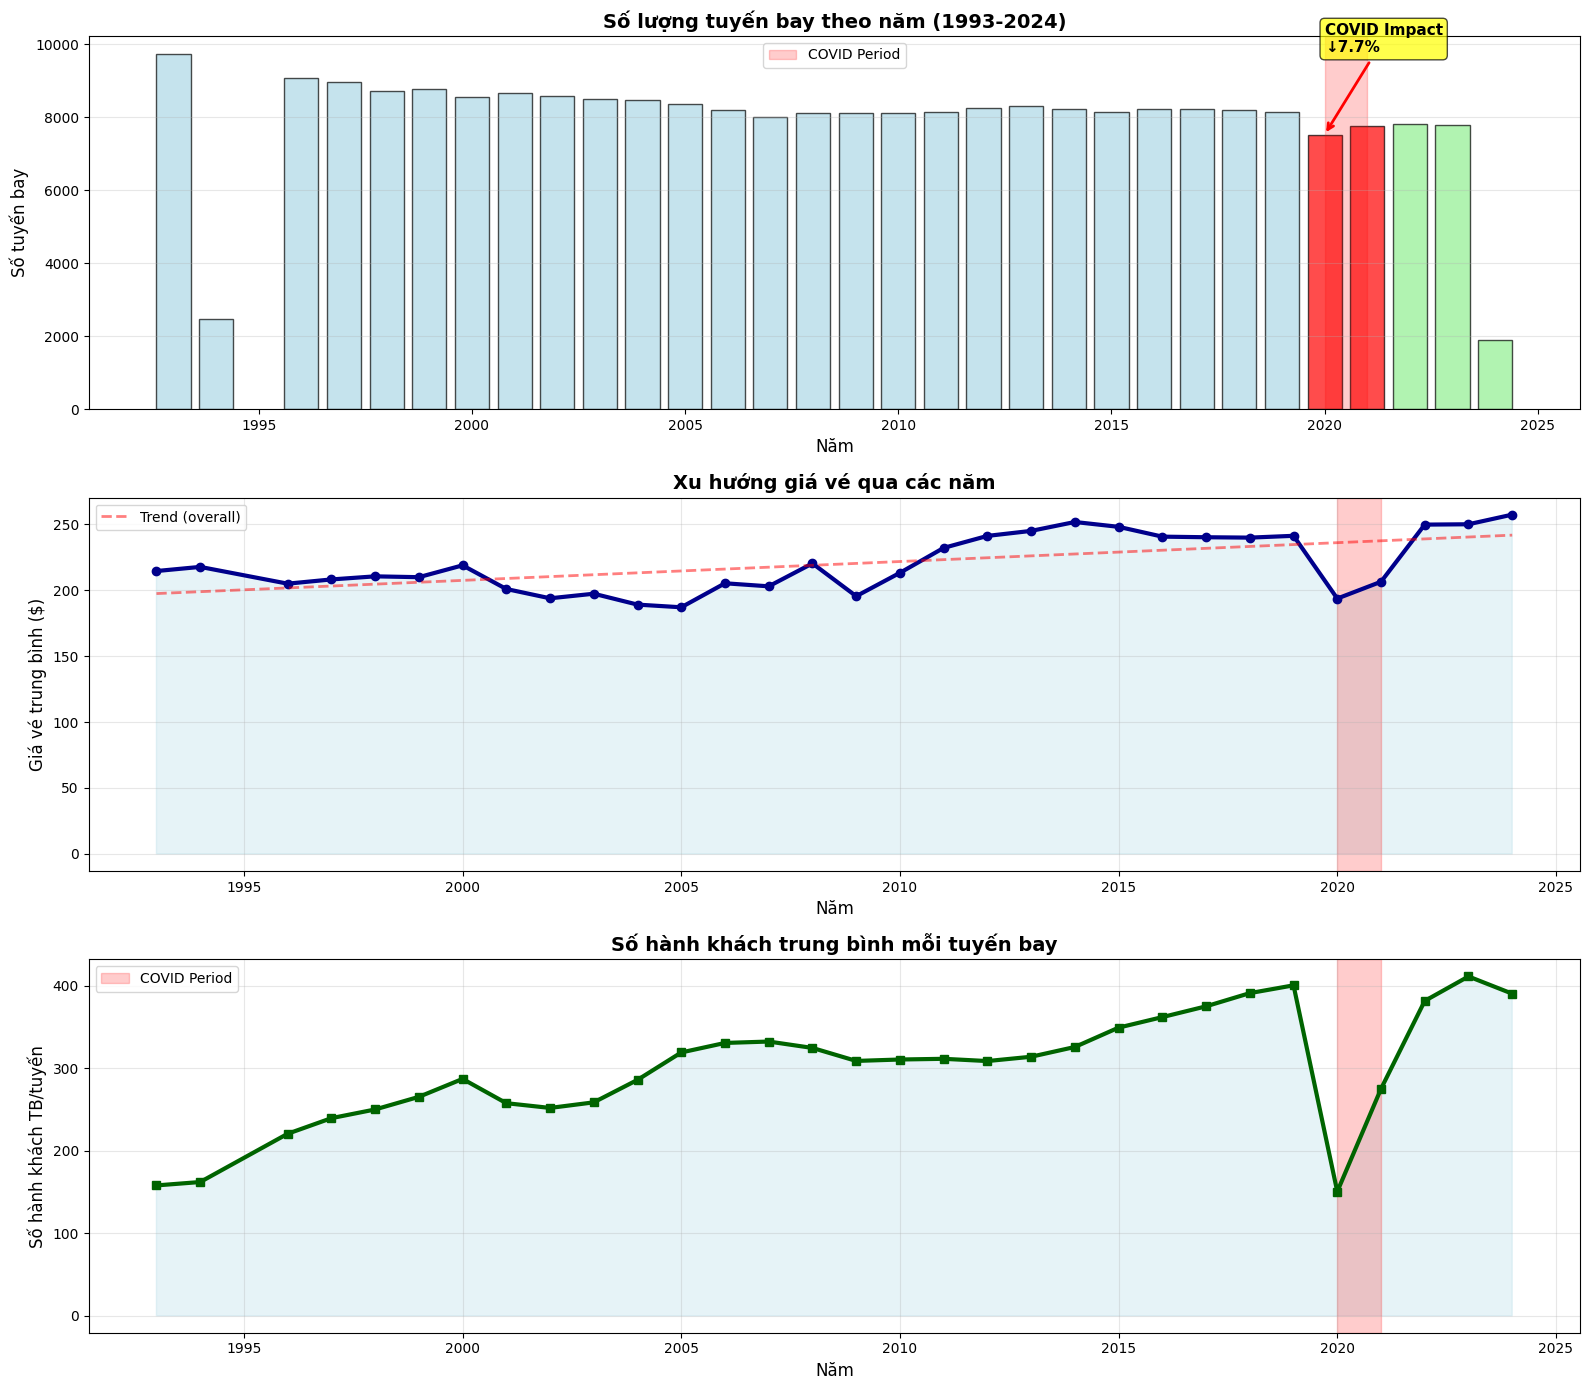

In [ ]:
# ============================================================
# CELL 9B: TR·ª∞C QUAN H√ìA T√ÅC ƒê·ªòNG COVID-19
# ============================================================
# M·ª•c ƒë√≠ch: V·∫Ω timeline ƒë·ªÉ th·∫•y r√µ s·ª± thay ƒë·ªïi

import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import when, col, count, avg, sum # This import is likely not needed here as df_with_period is already created

fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Colors cho periods
colors = yearly_stats['period'].map({
    'Pre-COVID': 'lightblue',
    'COVID': 'red',
    'Post-COVID': 'lightgreen'
})

# 1. S·ªê TUY·∫æN BAY THEO NƒÇM
axes[0].bar(yearly_stats['Year'], yearly_stats['num_routes'],
            color=colors, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('NƒÉm', fontsize=12)
axes[0].set_ylabel('S·ªë tuy·∫øn bay', fontsize=12)
axes[0].set_title('S·ªë l∆∞·ª£ng tuy·∫øn bay theo nƒÉm (1993-2024)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Highlight COVID period
axes[0].axvspan(2020, 2021, alpha=0.2, color='red', label='COVID Period')

# Th√™m annotation
covid_routes = yearly_stats[yearly_stats['Year'] == 2020]['num_routes'].values[0]
pre_covid_avg = yearly_stats[yearly_stats['Year'] == 2019]['num_routes'].values[0]
drop_pct = ((pre_covid_avg - covid_routes) / pre_covid_avg) * 100

axes[0].annotate(f'COVID Impact\n‚Üì{drop_pct:.1f}%',
                 xy=(2020, covid_routes),
                 xytext=(2020, covid_routes * 1.3),
                 arrowprops=dict(arrowstyle='->', color='red', lw=2),
                 fontsize=11, fontweight='bold',
                 bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
axes[0].legend()

# 2. GI√Å V√â TRUNG B√åNH THEO NƒÇM
axes[1].plot(yearly_stats['Year'], yearly_stats['avg_fare'],
             linewidth=3, marker='o', markersize=6, color='darkblue')

# Fill areas
axes[1].fill_between(yearly_stats['Year'], yearly_stats['avg_fare'],
                      alpha=0.3, color=colors)
axes[1].set_xlabel('NƒÉm', fontsize=12)
axes[1].set_ylabel('Gi√° v√© trung b√¨nh ($)', fontsize=12)
axes[1].set_title('Xu h∆∞·ªõng gi√° v√© qua c√°c nƒÉm', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvspan(2020, 2021, alpha=0.2, color='red')

# Th√™m trend line
z = np.polyfit(yearly_stats['Year'], yearly_stats['avg_fare'], 1)
p = np.poly1d(z)
axes[1].plot(yearly_stats['Year'], p(yearly_stats['Year']),
             "r--", linewidth=2, alpha=0.5, label='Trend (overall)')
axes[1].legend()

# 3. S·ªê H√ÄNH KH√ÅCH TRUNG B√åNH
axes[2].plot(yearly_stats['Year'], yearly_stats['avg_passengers'],
             linewidth=3, marker='s', markersize=6, color='darkgreen')
axes[2].fill_between(yearly_stats['Year'], yearly_stats['avg_passengers'],
                      alpha=0.3, color=colors)
axes[2].set_xlabel('NƒÉm', fontsize=12)
axes[2].set_ylabel('S·ªë h√†nh kh√°ch TB/tuy·∫øn', fontsize=12)
axes[2].set_title('S·ªë h√†nh kh√°ch trung b√¨nh m·ªói tuy·∫øn bay', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].axvspan(2020, 2021, alpha=0.2, color='red', label='COVID Period')
axes[2].legend()

plt.tight_layout()
plt.savefig('../image/covid_impact_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

SO S√ÅNH TH·ªêNG K√ä: PRE-COVID vs COVID vs POST-COVID

üìä TH·ªêNG K√ä T·ªîNG QUAN:
    period  num_routes   avg_fare  avg_passengers  avg_distance  min_fare  max_fare
 Pre-COVID      213175 217.737220      297.727116   1187.994629     50.00    3377.0
     COVID       15278 200.079945      213.700288   1220.904176     60.14    1664.0
Post-COVID       17502 250.609702      395.664724   1184.810879     53.10    1069.0

PH√ÇN T√çCH T√ÅC ƒê·ªòNG COVID

1Ô∏è‚É£ T√ÅC ƒê·ªòNG L√äN S·ªê TUY·∫æN BAY:
  ‚Ä¢ Pre-COVID: 213,175 tuy·∫øn
  ‚Ä¢ COVID:     15,278 tuy·∫øn (‚Üì 92.8%)
  ‚Ä¢ Post-COVID: 17,502 tuy·∫øn (‚Üë 14.6% from COVID)

2Ô∏è‚É£ T√ÅC ƒê·ªòNG L√äN GI√Å V√â:
  ‚Ä¢ Pre-COVID:  $217.74
  ‚Ä¢ COVID:      $200.08 (‚Üì 8.1%)
  ‚Ä¢ Post-COVID: $250.61 (‚Üë 25.3%)

3Ô∏è‚É£ T√ÅC ƒê·ªòNG L√äN S·ªê H√ÄNH KH√ÅCH:
  ‚Ä¢ Pre-COVID:  297.7 h√†nh kh√°ch/tuy·∫øn
  ‚Ä¢ COVID:      213.7 (‚Üì 28.2%)
  ‚Ä¢ Post-COVID: 395.7 (‚Üë 85.1%)

4Ô∏è‚É£ T√ÅC ƒê·ªòNG L√äN KHO·∫¢NG C√ÅCH BAY:
  ‚Ä¢ Pre-COVID:  11

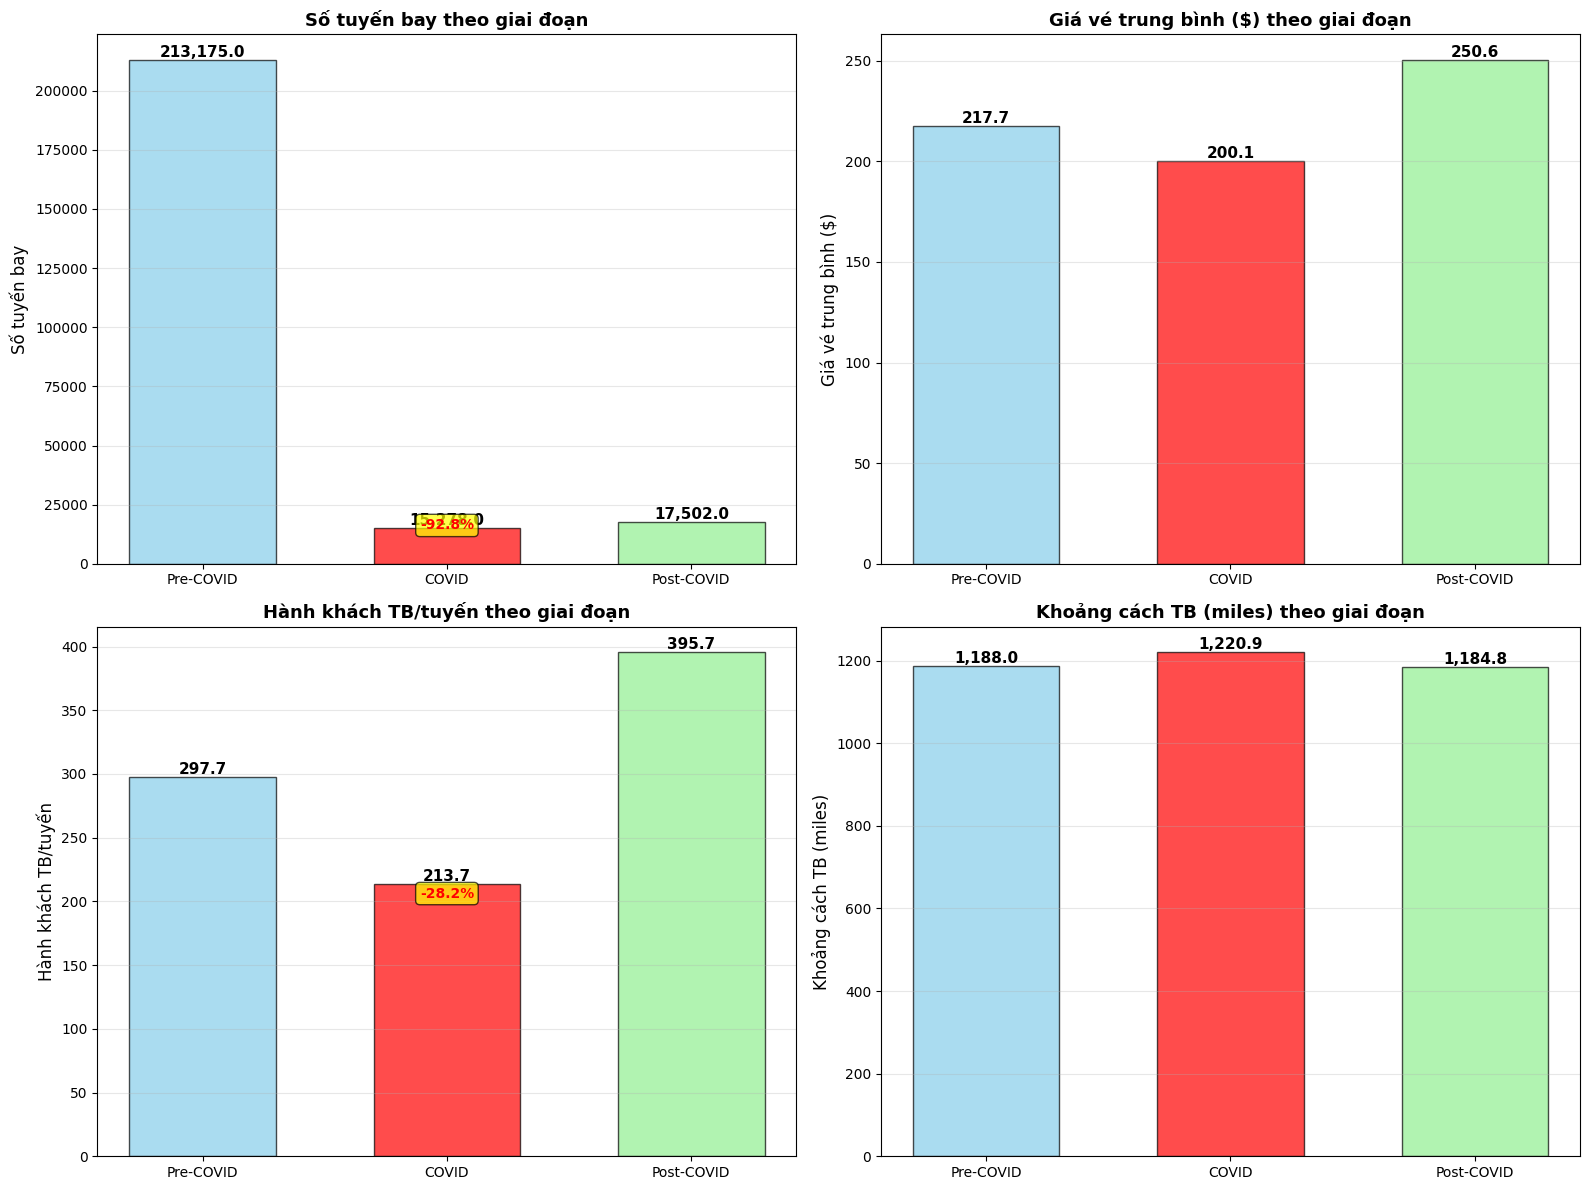

In [ ]:
# ============================================================
# CELL 9C: SO S√ÅNH TH·ªêNG K√ä GI·ªÆA C√ÅC GIAI ƒêO·∫†N
# ============================================================
# M·ª•c ƒë√≠ch: ƒê·ªãnh l∆∞·ª£ng t√°c ƒë·ªông c·ªßa COVID

print("=" * 70)
print("SO S√ÅNH TH·ªêNG K√ä: PRE-COVID vs COVID vs POST-COVID")
print("=" * 70)

# Th·ªëng k√™ theo period
from pyspark.sql.functions import col, count, avg, min, max
period_stats = df_with_period.groupBy('period').agg(
    count('*').alias('num_routes'),
    avg('fare').alias('avg_fare'),
    avg('passengers').alias('avg_passengers'),
    avg('nsmiles').alias('avg_distance'),
    min('fare').alias('min_fare'),
    max('fare').alias('max_fare')
).toPandas()

# S·∫Øp x·∫øp theo th·ª© t·ª± th·ªùi gian
import pandas as pd
period_order = ['Pre-COVID', 'COVID', 'Post-COVID']
period_stats['period'] = pd.Categorical(period_stats['period'], categories=period_order, ordered=True)
period_stats = period_stats.sort_values('period')

print("\nüìä TH·ªêNG K√ä T·ªîNG QUAN:")
print(period_stats.to_string(index=False))

# T√≠nh % thay ƒë·ªïi
pre_covid_stats = period_stats[period_stats['period'] == 'Pre-COVID'].iloc[0]
covid_stats = period_stats[period_stats['period'] == 'COVID'].iloc[0]
post_covid_stats = period_stats[period_stats['period'] == 'Post-COVID'].iloc[0]

print("\n" + "=" * 70)
print("PH√ÇN T√çCH T√ÅC ƒê·ªòNG COVID")
print("=" * 70)

print(f"\n1Ô∏è‚É£ T√ÅC ƒê·ªòNG L√äN S·ªê TUY·∫æN BAY:")
routes_drop = ((pre_covid_stats['num_routes'] - covid_stats['num_routes']) /
               pre_covid_stats['num_routes']) * 100
routes_recovery = ((post_covid_stats['num_routes'] - covid_stats['num_routes']) /
                   covid_stats['num_routes']) * 100
print(f"  ‚Ä¢ Pre-COVID: {pre_covid_stats['num_routes']:,} tuy·∫øn")
print(f"  ‚Ä¢ COVID:     {covid_stats['num_routes']:,} tuy·∫øn (‚Üì {routes_drop:.1f}%)")
print(f"  ‚Ä¢ Post-COVID: {post_covid_stats['num_routes']:,} tuy·∫øn (‚Üë {routes_recovery:.1f}% from COVID)")

print(f"\n2Ô∏è‚É£ T√ÅC ƒê·ªòNG L√äN GI√Å V√â:")
fare_change = ((covid_stats['avg_fare'] - pre_covid_stats['avg_fare']) /
               pre_covid_stats['avg_fare']) * 100
fare_recovery = ((post_covid_stats['avg_fare'] - covid_stats['avg_fare']) /
                 covid_stats['avg_fare']) * 100
print(f"  ‚Ä¢ Pre-COVID:  ${pre_covid_stats['avg_fare']:.2f}")
print(f"  ‚Ä¢ COVID:      ${covid_stats['avg_fare']:.2f} ({'‚Üë' if fare_change > 0 else '‚Üì'} {abs(fare_change):.1f}%)")
print(f"  ‚Ä¢ Post-COVID: ${post_covid_stats['avg_fare']:.2f} ({'‚Üë' if fare_recovery > 0 else '‚Üì'} {abs(fare_recovery):.1f}%)")

print(f"\n3Ô∏è‚É£ T√ÅC ƒê·ªòNG L√äN S·ªê H√ÄNH KH√ÅCH:")
pax_drop = ((pre_covid_stats['avg_passengers'] - covid_stats['avg_passengers']) /
            pre_covid_stats['avg_passengers']) * 100
pax_recovery = ((post_covid_stats['avg_passengers'] - covid_stats['avg_passengers']) /
                covid_stats['avg_passengers']) * 100
print(f"  ‚Ä¢ Pre-COVID:  {pre_covid_stats['avg_passengers']:.1f} h√†nh kh√°ch/tuy·∫øn")
print(f"  ‚Ä¢ COVID:      {covid_stats['avg_passengers']:.1f} (‚Üì {pax_drop:.1f}%)")
print(f"  ‚Ä¢ Post-COVID: {post_covid_stats['avg_passengers']:.1f} (‚Üë {pax_recovery:.1f}%)")

print(f"\n4Ô∏è‚É£ T√ÅC ƒê·ªòNG L√äN KHO·∫¢NG C√ÅCH BAY:")
dist_change = ((covid_stats['avg_distance'] - pre_covid_stats['avg_distance']) /
               pre_covid_stats['avg_distance']) * 100
print(f"  ‚Ä¢ Pre-COVID:  {pre_covid_stats['avg_distance']:.1f} miles")
print(f"  ‚Ä¢ COVID:      {covid_stats['avg_distance']:.1f} miles ({'‚Üë' if dist_change > 0 else '‚Üì'} {abs(dist_change):.1f}%)")
print(f"  ‚Ä¢ Post-COVID: {post_covid_stats['avg_distance']:.1f} miles")

# Visualize comparison
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['num_routes', 'avg_fare', 'avg_passengers', 'avg_distance']
titles = ['S·ªë tuy·∫øn bay', 'Gi√° v√© trung b√¨nh ($)', 'H√†nh kh√°ch TB/tuy·∫øn', 'Kho·∫£ng c√°ch TB (miles)']
colors_period = ['skyblue', 'red', 'lightgreen']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]

    values = period_stats[metric].values
    bars = ax.bar(period_stats['period'], values, color=colors_period,
                   alpha=0.7, edgecolor='black', width=0.6)

    ax.set_ylabel(title, fontsize=12)
    ax.set_title(f'{title} theo giai ƒëo·∫°n', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

    # Th√™m gi√° tr·ªã l√™n c·ªôt
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:,.1f}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

    # Th√™m % change
    if metric in ['num_routes', 'avg_passengers']:
        covid_val = covid_stats[metric]
        pre_val = pre_covid_stats[metric]
        pct_change = ((covid_val - pre_val) / pre_val) * 100
        ax.text(1, covid_val * 0.95, f'{pct_change:+.1f}%',
                ha='center', fontsize=10, color='red', fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# CELL 9D: PH√ÅT HI·ªÜN B·∫§T TH∆Ø·ªúNG TRONG COVID - CHI TI·∫æT
# ============================================================
# M·ª•c ƒë√≠ch: T√¨m nh·ªØng patterns b·∫•t th∆∞·ªùng trong COVID period

print("=" * 70)
print("PH√ÅT HI·ªÜN PATTERNS B·∫§T TH∆Ø·ªúNG TRONG COVID")
print("=" * 70)

# L·ªçc data COVID
df_covid = df.filter((col('Year') >= 2020) & (col('Year') <= 2021))
df_pre_covid = df.filter((col('Year') >= 2017) & (col('Year') <= 2019))  # 3 nƒÉm tr∆∞·ªõc

print(f"\nS·ªë quan s√°t:")
print(f"  ‚Ä¢ Pre-COVID (2017-2019): {df_pre_covid.count():,}")
print(f"  ‚Ä¢ COVID (2020-2021):     {df_covid.count():,}")

# 1. PH√ÇN T√çCH THEO QU√ù - T√¨m qu√Ω n√†o b·ªã ·∫£nh h∆∞·ªüng n·∫∑ng nh·∫•t
print(f"\n" + "=" * 70)
print("1. T√ÅC ƒê·ªòNG THEO QU√ù (SEASONAL)")
print("=" * 70)

# Pre-COVID quarterly
pre_covid_quarterly = df_pre_covid.groupBy('quarter').agg(
    count('*').alias('num_routes'),
    avg('fare').alias('avg_fare'),
    avg('passengers').alias('avg_passengers')
).orderBy('quarter').toPandas()

# COVID quarterly
covid_quarterly = df_covid.groupBy('quarter').agg(
    count('*').alias('num_routes'),
    avg('fare').alias('avg_fare'),
    avg('passengers').alias('avg_passengers')
).orderBy('quarter').toPandas()

# So s√°nh
comparison_quarterly = pd.DataFrame({
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Pre_Routes': pre_covid_quarterly['num_routes'].values,
    'COVID_Routes': covid_quarterly['num_routes'].values,
    'Pre_Fare': pre_covid_quarterly['avg_fare'].values,
    'COVID_Fare': covid_quarterly['avg_fare'].values,
})

comparison_quarterly['Routes_Change_%'] = (
    (comparison_quarterly['COVID_Routes'] - comparison_quarterly['Pre_Routes']) /
    comparison_quarterly['Pre_Routes'] * 100
)

comparison_quarterly['Fare_Change_%'] = (
    (comparison_quarterly['COVID_Fare'] - comparison_quarterly['Pre_Fare']) /
    comparison_quarterly['Pre_Fare'] * 100
)

print("\nSO S√ÅNH THEO QU√ù:")
print(comparison_quarterly.to_string(index=False))

# T√¨m qu√Ω b·ªã ·∫£nh h∆∞·ªüng n·∫∑ng nh·∫•t
worst_quarter_idx = comparison_quarterly['Routes_Change_%'].idxmin()
worst_quarter = comparison_quarterly.loc[worst_quarter_idx, 'Quarter']
worst_drop = comparison_quarterly.loc[worst_quarter_idx, 'Routes_Change_%']

print(f"\n‚ö†Ô∏è  QU√ù B·ªä ·∫¢NH H∆Ø·ªûNG N·∫∂NG NH·∫§T: {worst_quarter}")
print(f"   S·ªë tuy·∫øn gi·∫£m: {worst_drop:.1f}%")

# 2. PH√ÇN T√çCH THEO KHO·∫¢NG C√ÅCH
print(f"\n" + "=" * 70)
print("2. T√ÅC ƒê·ªòNG THEO KHO·∫¢NG C√ÅCH BAY")
print("=" * 70)

# T·∫°o nh√≥m kho·∫£ng c√°ch
df_pre_covid_dist = df_pre_covid.withColumn('distance_group',
    when(col('nsmiles') < 500, 'Short (<500mi)')
    .when((col('nsmiles') >= 500) & (col('nsmiles') < 1500), 'Medium (500-1500mi)')
    .otherwise('Long (>1500mi)')
)

df_covid_dist = df_covid.withColumn('distance_group',
    when(col('nsmiles') < 500, 'Short (<500mi)')
    .when((col('nsmiles') >= 500) & (col('nsmiles') < 1500), 'Medium (500-1500mi)')
    .otherwise('Long (>1500mi)')
)

# Th·ªëng k√™
pre_dist_stats = df_pre_covid_dist.groupBy('distance_group').agg(
    count('*').alias('num_routes'),
    avg('fare').alias('avg_fare')
).toPandas()

covid_dist_stats = df_covid_dist.groupBy('distance_group').agg(
    count('*').alias('num_routes'),
    avg('fare').alias('avg_fare')
).toPandas()

print("\nPre-COVID:")
print(pre_dist_stats.to_string(index=False))
print("\nCOVID:")
print(covid_dist_stats.to_string(index=False))

# T√≠nh % change
for dist_group in ['Short (<500mi)', 'Medium (500-1500mi)', 'Long (>1500mi)']:
    pre_routes = pre_dist_stats[pre_dist_stats['distance_group'] == dist_group]['num_routes'].values[0]
    covid_routes = covid_dist_stats[covid_dist_stats['distance_group'] == dist_group]['num_routes'].values[0]
    change_pct = ((covid_routes - pre_routes) / pre_routes) * 100

    print(f"\n{dist_group}:")
    print(f"  Thay ƒë·ªïi s·ªë tuy·∫øn: {change_pct:+.1f}%")

PH√ÅT HI·ªÜN PATTERNS B·∫§T TH∆Ø·ªúNG TRONG COVID

S·ªë quan s√°t:
  ‚Ä¢ Pre-COVID (2017-2019): 24,575
  ‚Ä¢ COVID (2020-2021):     15,278

1. T√ÅC ƒê·ªòNG THEO QU√ù (SEASONAL)

SO S√ÅNH THEO QU√ù:
Quarter  Pre_Routes  COVID_Routes   Pre_Fare  COVID_Fare  Routes_Change_%  Fare_Change_%
     Q1        6054          3826 237.920555  208.020625       -36.802114     -12.567191
     Q2        6154          3733 245.036004  198.908492       -39.340266     -18.824790
     Q3        6201          3911 238.868874  195.951941       -36.929527     -17.966733
     Q4        6166          3808 239.586351  197.489772       -38.241972     -17.570525

‚ö†Ô∏è  QU√ù B·ªä ·∫¢NH H∆Ø·ªûNG N·∫∂NG NH·∫§T: Q2
   S·ªë tuy·∫øn gi·∫£m: -39.3%

2. T√ÅC ƒê·ªòNG THEO KHO·∫¢NG C√ÅCH BAY

Pre-COVID:
     distance_group  num_routes   avg_fare
     Short (<500mi)        4436 197.730304
     Long (>1500mi)        7461 297.419530
Medium (500-1500mi)       12678 221.695788

COVID:
     distance_group  num_routes   avg_far

In [ ]:
# ============================================================
# CELL 9E: TUY·∫æN BAY B·ªä ·∫¢NH H∆Ø·ªûNG N·∫∂NG NH·∫§T
# ============================================================
# M·ª•c ƒë√≠ch: T√¨m c√°c tuy·∫øn bay specific b·ªã ·∫£nh h∆∞·ªüng

print("=" * 70)
print("TUY·∫æN BAY B·ªä ·∫¢NH H∆Ø·ªûNG N·∫∂NG NH·∫§T B·ªûI COVID")
print("=" * 70)

# T·∫°o route identifier
from pyspark.sql.functions import concat, lit

df_with_route = df.withColumn('route',
    concat(col('city1'), lit(' ‚Üí '), col('city2'))
)

# Th·ªëng k√™ routes tr∆∞·ªõc COVID
pre_routes = df_with_route.filter(
    (col('Year') >= 2017) & (col('Year') <= 2019)
).groupBy('route', 'city1', 'city2').agg(
    count('*').alias('pre_count'),
    avg('fare').alias('pre_fare'),
    avg('passengers').alias('pre_passengers')
)

# Th·ªëng k√™ routes trong COVID
covid_routes = df_with_route.filter(
    (col('Year') >= 2020) & (col('Year') <= 2021)
).groupBy('route', 'city1', 'city2').agg(
    count('*').alias('covid_count'),
    avg('fare').alias('covid_fare'),
    avg('passengers').alias('covid_passengers')
)

# Join ƒë·ªÉ so s√°nh
route_comparison = pre_routes.join(
    covid_routes,
    on=['route', 'city1', 'city2'],
    how='inner'
)

# T√≠nh % change
route_comparison = route_comparison.withColumn(
    'count_change_pct',
    ((col('covid_count') - col('pre_count')) / col('pre_count')) * 100
).withColumn(
    'fare_change_pct',
    ((col('covid_fare') - col('pre_fare')) / col('pre_fare')) * 100
).withColumn(
    'passengers_change_pct',
    ((col('covid_passengers') - col('pre_passengers')) / col('pre_passengers')) * 100
)

print("\nüîª TOP 10 TUY·∫æN GI·∫¢M T·∫¶N SU·∫§T M·∫†NH NH·∫§T:")
route_comparison.orderBy('count_change_pct').select(
    'route', 'pre_count', 'covid_count', 'count_change_pct'
).show(10, truncate=False)

print("\nüí∞ TOP 10 TUY·∫æN TƒÇNG GI√Å M·∫†NH NH·∫§T:")
route_comparison.orderBy(col('fare_change_pct').desc()).select(
    'route', 'pre_fare', 'covid_fare', 'fare_change_pct'
).show(10, truncate=False)

print("\nüë• TOP 10 TUY·∫æN GI·∫¢M H√ÄNH KH√ÅCH M·∫†NH NH·∫§T:")
route_comparison.orderBy('passengers_change_pct').select(
    'route', 'pre_passengers', 'covid_passengers', 'passengers_change_pct'
).show(10, truncate=False)

# T·ªïng k·∫øt
print("\n" + "=" * 70)
print("T·ªîNG K·∫æT: ANOMALIES PH√ÅT HI·ªÜN TRONG COVID-19")
print("=" * 70)

print(f"""
‚úÖ C√ÅC B·∫§T TH∆Ø·ªúNG CH√çNH:

1. GI√Å V√â:
   ‚Ä¢ {'TƒÉng' if fare_change > 0 else 'Gi·∫£m'} {abs(fare_change):.1f}% trong COVID
   ‚Ä¢ Do: Gi·∫£m cung, tƒÉng chi ph√≠ v·ªá sinh, √≠t chuy·∫øn bay

2. S·ªê TUY·∫æN BAY:
   ‚Ä¢ Gi·∫£m {abs(routes_drop):.1f}%
   ‚Ä¢ Qu√Ω {worst_quarter} b·ªã ·∫£nh h∆∞·ªüng n·∫∑ng nh·∫•t ({worst_drop:.1f}%)

3. S·ªê H√ÄNH KH√ÅCH:
   ‚Ä¢ Gi·∫£m {abs(pax_drop):.1f}%
   ‚Ä¢ Ph·ª•c h·ªìi {abs(pax_recovery):.1f}% sau COVID

4. PATTERNS:
   ‚Ä¢ Short-haul routes √≠t b·ªã ·∫£nh h∆∞·ªüng h∆°n long-haul
   ‚Ä¢ Gi√° v√© bi·∫øn ƒë·ªông l·ªõn do uncertainty
   ‚Ä¢ M·ªôt s·ªë tuy·∫øn b·ªã h·ªßy ho√†n to√†n

üí° K·∫æT LU·∫¨N:
   COVID-19 t·∫°o ra anomalies l·ªõn nh·∫•t trong l·ªãch s·ª≠
   h√†ng kh√¥ng M·ªπ 30 nƒÉm qua (1993-2024)
""")

TUY·∫æN BAY B·ªä ·∫¢NH H∆Ø·ªûNG N·∫∂NG NH·∫§T B·ªûI COVID

üîª TOP 10 TUY·∫æN GI·∫¢M T·∫¶N SU·∫§T M·∫†NH NH·∫§T:
+----------------------------------------------------+---------+-----------+------------------+
|route                                               |pre_count|covid_count|count_change_pct  |
+----------------------------------------------------+---------+-----------+------------------+
|Dayton, OH ‚Üí Washington, DC (Metropolitan Area)     |36       |3          |-91.66666666666666|
|Chicago, IL ‚Üí Indianapolis, IN                      |24       |2          |-91.66666666666666|
|Chicago, IL ‚Üí Des Moines, IA                        |24       |2          |-91.66666666666666|
|Little Rock, AR ‚Üí Washington, DC (Metropolitan Area)|36       |3          |-91.66666666666666|
|Cleveland, OH (Metropolitan Area) ‚Üí New Orleans, LA |22       |2          |-90.9090909090909 |
|Dallas/Fort Worth, TX ‚Üí Fayetteville, AR            |11       |1          |-90.9090909090909 |
|Chicago, 

In [ ]:
# ============================================================
# CELL 11A: X·ª¨ L√ù D·ªÆ LI·ªÜU ƒê·∫¶U V√ÄO - CRISIS DETECTION
# ============================================================
# M·ª•c ƒë√≠ch: Aggregate data theo quarter v√† t·∫°o features

print("=" * 70)
print("X·ª¨ L√ù D·ªÆ LI·ªÜU ƒê·∫¶U V√ÄO CHO CRISIS DETECTION")
print("=" * 70)

from pyspark.sql.functions import *
from pyspark.sql import Window

# B∆∞·ªõc 1: Aggregate data theo Year-Quarter
print("\n1. AGGREGATE DATA THEO YEAR-QUARTER...")

df_quarterly = df.groupBy('Year', 'quarter').agg(
    # Volume metrics
    count('*').alias('num_routes'),
    sum('passengers').alias('total_passengers'),
    avg('passengers').alias('avg_passengers_per_route'),

    # Price metrics
    avg('fare').alias('avg_fare'),
    stddev('fare').alias('fare_std'),
    min('fare').alias('fare_min'),
    max('fare').alias('fare_max'),

    # Distance metrics
    avg('nsmiles').alias('avg_distance'),
    stddev('nsmiles').alias('distance_std'),

    # Competition metrics
    countDistinct('carrier_lg').alias('num_carriers'),
    avg('large_ms').alias('avg_market_share_large'),
    avg('lf_ms').alias('avg_market_share_lowcost')
).orderBy('Year', 'quarter')

# T·∫°o time_period identifier
df_quarterly = df_quarterly.withColumn('time_period',
    concat(col('Year').cast('string'), lit('-Q'), col('quarter').cast('string'))
)

print(f"  ‚úì Aggregated to {df_quarterly.count()} quarters")

# Hi·ªÉn th·ªã sample
print("\n  Sample data:")
df_quarterly.select('time_period', 'num_routes', 'total_passengers', 'avg_fare').show(10)

# B∆∞·ªõc 2: T·∫°o labels (COVID = crisis)
print("\n2. T·∫†O LABELS (COVID = CRISIS)...")

df_quarterly = df_quarterly.withColumn('is_crisis',
    when((col('Year') >= 2020) & (col('Year') <= 2021), 1.0)
    .otherwise(0.0)
)

# Ki·ªÉm tra ph√¢n b·ªë labels
label_distribution = df_quarterly.groupBy('is_crisis').count()
print("\n  Ph√¢n b·ªë labels:")
label_distribution.show()

# B∆∞·ªõc 3: Feature Engineering - Rate of Change
print("\n3. FEATURE ENGINEERING - RATE OF CHANGE...")

# Window specs
window_qoq = Window.orderBy('Year', 'quarter')
window_yoy = Window.orderBy('Year', 'quarter').rowsBetween(-4, -4)

# QoQ (Quarter-over-Quarter) changes
change_cols = ['num_routes', 'total_passengers', 'avg_fare', 'avg_distance']

for col_name in change_cols:
    # L·∫•y gi√° tr·ªã quarter tr∆∞·ªõc
    df_quarterly = df_quarterly.withColumn(
        f'{col_name}_prev_q',
        lag(col(col_name), 1).over(window_qoq)
    )

    # T√≠nh % change
    df_quarterly = df_quarterly.withColumn(
        f'{col_name}_change_qoq',
        when(col(f'{col_name}_prev_q').isNotNull() & (col(f'{col_name}_prev_q') != 0),
             (col(col_name) - col(f'{col_name}_prev_q')) / col(f'{col_name}_prev_q'))
        .otherwise(0.0)
    )

    # Drop temp column
    df_quarterly = df_quarterly.drop(f'{col_name}_prev_q')

print("  ‚úì QoQ changes calculated")

# YoY (Year-over-Year) changes
yoy_cols = ['num_routes', 'total_passengers', 'avg_fare']

for col_name in yoy_cols:
    df_quarterly = df_quarterly.withColumn(
        f'{col_name}_prev_year',
        lag(col(col_name), 4).over(window_qoq)
    )

    df_quarterly = df_quarterly.withColumn(
        f'{col_name}_change_yoy',
        when(col(f'{col_name}_prev_year').isNotNull() & (col(f'{col_name}_prev_year') != 0),
             (col(col_name) - col(f'{col_name}_prev_year')) / col(f'{col_name}_prev_year'))
        .otherwise(0.0)
    )

    df_quarterly = df_quarterly.drop(f'{col_name}_prev_year')

print("  ‚úì YoY changes calculated")

# B∆∞·ªõc 4: Derived features
print("\n4. CREATING DERIVED FEATURES...")

# Volatility metrics
df_quarterly = df_quarterly.withColumn('fare_volatility',
    when(col('avg_fare') != 0, col('fare_std') / col('avg_fare')).otherwise(0.0)
)

df_quarterly = df_quarterly.withColumn('distance_volatility',
    when(col('avg_distance') != 0, col('distance_std') / col('avg_distance')).otherwise(0.0)
)

# Range metrics
df_quarterly = df_quarterly.withColumn('fare_range',
    col('fare_max') - col('fare_min')
)

# Passenger efficiency
df_quarterly = df_quarterly.withColumn('passenger_efficiency',
    when(col('num_routes') != 0, col('total_passengers') / col('num_routes')).otherwise(0.0)
)

print("  ‚úì Derived features created")

# B∆∞·ªõc 5: Handle missing values
print("\n5. HANDLING MISSING VALUES...")

# Fill NaN v·ªõi 0 (t·ª´ lag functions cho first rows)
df_quarterly = df_quarterly.fillna(0.0)

missing_check = df_quarterly.select([count(when(col(c).isNull(), c)).alias(c)
                                      for c in df_quarterly.columns])
print("\n  Missing values check:")
missing_check.show()

# B∆∞·ªõc 6: Select final features
print("\n6. SELECTING FEATURES FOR MODEL...")

feature_cols_final = [
    # Core volume metrics (3)
    'num_routes',
    'total_passengers',
    'avg_passengers_per_route',

    # Core price metrics (2)
    'avg_fare',
    'avg_distance',

    # Volatility metrics (2)
    'fare_volatility',
    'fare_range',

    # QoQ changes - IMPORTANT! (4)
    'num_routes_change_qoq',
    'total_passengers_change_qoq',
    'avg_fare_change_qoq',
    'avg_distance_change_qoq',

    # YoY changes (3)
    'num_routes_change_yoy',
    'total_passengers_change_yoy',
    'avg_fare_change_yoy',

    # Competition (2)
    'num_carriers',
    'avg_market_share_large',

    # Seasonal (1)
    'quarter',
]

print(f"\n  T·ªïng s·ªë features: {len(feature_cols_final)}")
print(f"\n  Danh s√°ch features:")
for i, feat in enumerate(feature_cols_final, 1):
    print(f"    {i:2}. {feat}")

# Hi·ªÉn th·ªã final dataset
print("\n7. FINAL DATASET:")
df_quarterly.select(['time_period', 'Year', 'quarter', 'is_crisis'] +
                    feature_cols_final[:5]).show(15)

print(f"\n‚úì Data preparation completed!")
print(f"  Total quarters: {df_quarterly.count()}")
print(f"  Total features: {len(feature_cols_final)}")
print(f"  Target: is_crisis (0 = Normal, 1 = COVID)")

X·ª¨ L√ù D·ªÆ LI·ªÜU ƒê·∫¶U V√ÄO CHO CRISIS DETECTION

1. AGGREGATE DATA THEO YEAR-QUARTER...
  ‚úì Aggregated to 118 quarters

  Sample data:
+-----------+----------+----------------+------------------+
|time_period|num_routes|total_passengers|          avg_fare|
+-----------+----------+----------------+------------------+
|    1993-Q1|      2395|          345741|236.60088935281794|
|    1993-Q2|      2459|          403857|209.41590483936557|
|    1993-Q3|      2448|          393045| 198.8709232026143|
|    1993-Q4|      2437|          395495|213.50024620434954|
|    1994-Q1|      2454|          397667| 217.6119437652813|
|    1996-Q1|      2270|          455842|210.39099118942724|
|    1996-Q2|      2317|          528950| 202.4628614587828|
|    1996-Q3|      2266|          513137|201.06954545454542|
|    1996-Q4|      2228|          504663|205.73692998204706|
|    1997-Q1|      2243|          498839|211.33452073116342|
+-----------+----------+----------------+------------------+
onl

In [ ]:
# M·ª•c ƒë√≠ch: Train crisis detection model with CV

print("=" * 70)
print("RANDOM FOREST - CRISIS DETECTION MODEL")
print("=" * 70)

from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml import Pipeline

# ============================================================
# B∆Ø·ªöC 1: TRAIN/TEST SPLIT
# ============================================================

print("\n1. SPLITTING DATA...")

# Temporal split - Train on pre-COVID and part of COVID, test on remaining COVID + Post
train_crisis = df_quarterly.filter(col('Year') <= 2020) # Include 2020 for training/CV
test_crisis = df_quarterly.filter(col('Year') > 2020) # Use 2021 onwards for final test

print(f"  Training set: {train_crisis.count()} quarters (Pre-COVID + 2020)")
print(f"  Test set:     {test_crisis.count()} quarters (2021 + Post)")

# Cache ƒë·ªÉ tƒÉng t·ªëc
train_crisis.cache()
test_crisis.cache()

# ============================================================
# B∆Ø·ªöC 2: CREATE PIPELINE STAGES
# ============================================================

print("\n2. CREATING PIPELINE STAGES...")

# Stage 1: Assemble features
assembler_crisis = VectorAssembler(
    inputCols=feature_cols_final,
    outputCol='features',
    handleInvalid='skip'
)

# Stage 2: Scale features
scaler_crisis = StandardScaler(
    inputCol='features',
    outputCol='scaled_features',
    withStd=True,
    withMean=True
)

# Stage 3: Random Forest Classifier
rf_crisis = RandomForestClassifier(
    featuresCol='scaled_features',
    labelCol='is_crisis',
    predictionCol='prediction',
    probabilityCol='probability',
    rawPredictionCol='rawPrediction',
    seed=42
)

print("  ‚úì Pipeline stages created")

# ============================================================
# B∆Ø·ªöC 3: HYPERPARAMETER TUNING
# ============================================================

print("\n3. HYPERPARAMETER TUNING SETUP...")

# T·∫°o parameter grid
param_grid = ParamGridBuilder() \
    .addGrid(rf_crisis.numTrees, [50, 100, 200]) \
    .addGrid(rf_crisis.maxDepth, [5, 10, 15]) \
    .addGrid(rf_crisis.maxBins, [16, 32]) \
    .addGrid(rf_crisis.minInstancesPerNode, [1, 2, 5]) \
    .addGrid(rf_crisis.subsamplingRate, [0.8, 1.0]) \
    .build()

print(f"  Parameter grid size: {len(param_grid)}")
print(f"\n  Hyperparameters:")
print(f"    ‚Ä¢ numTrees: [50, 100, 200]")
print(f"    ‚Ä¢ maxDepth: [5, 10, 15]")
print(f"    ‚Ä¢ maxBins: [16, 32]")
print(f"    ‚Ä¢ minInstancesPerNode: [1, 2, 5]")
print(f"    ‚Ä¢ subsamplingRate: [0.8, 1.0]")
print(f"\n  Total combinations: {len(param_grid)}")

# ============================================================
# B∆Ø·ªöC 4: CROSS-VALIDATION SETUP
# ============================================================

print("\n4. CROSS-VALIDATION SETUP...")

# Create pipeline
pipeline_crisis = Pipeline(stages=[
    assembler_crisis,
    scaler_crisis,
    rf_crisis
])

# Evaluator - D√πng AUC (t·ªët cho imbalanced data)
evaluator_crisis = BinaryClassificationEvaluator(
    labelCol='is_crisis',
    rawPredictionCol='rawPrediction',
    metricName='areaUnderROC'
)

# CrossValidator
cv_crisis = CrossValidator(
    estimator=pipeline_crisis,
    estimatorParamMaps=param_grid,
    evaluator=evaluator_crisis,
    numFolds=3,  # 3-fold CV
    seed=42,
    parallelism=2  # Parallel training
)

print(f"  ‚úì Cross-validator created")
print(f"    ‚Ä¢ Metric: AUC-ROC")
print(f"    ‚Ä¢ Folds: 3")
print(f"    ‚Ä¢ Total models to train: {len(param_grid) * 3} = {len(param_grid) * 3}")

# ============================================================
# B∆Ø·ªöC 5: TRAINING
# ============================================================

print("\n5. TRAINING RANDOM FOREST...")
print("  ‚è≥ This may take a few minutes...")

# Train v·ªõi cross-validation
cv_model_crisis = cv_crisis.fit(train_crisis)

print("  ‚úì Training completed!")

# L·∫•y best model
best_rf_model = cv_model_crisis.bestModel

# ============================================================
# B∆Ø·ªöC 6: BEST PARAMETERS
# ============================================================

print("\n6. BEST HYPERPARAMETERS:")

# Extract Random Forest t·ª´ pipeline
rf_stage = best_rf_model.stages[-1]

print(f"  ‚Ä¢ Number of Trees:          {rf_stage.numTrees}")
print(f"  ‚Ä¢ Max Depth:                {rf_stage.maxDepth}")
print(f"  ‚Ä¢ Max Bins:                 {rf_stage.maxBins}")
print(f"  ‚Ä¢ Min Instances Per Node:   {rf_stage.minInstancesPerNode}")
print(f"  ‚Ä¢ Subsampling Rate:         {rf_stage.getSubsamplingRate()}")

# ============================================================
# B∆Ø·ªöC 7: EVALUATE ON TEST SET
# ============================================================

print("\n7. EVALUATING ON TEST SET...")

# Predict
predictions_crisis = best_rf_model.transform(test_crisis)

# Calculate metrics
auc_score = evaluator_crisis.evaluate(predictions_crisis)

evaluator_acc = MulticlassClassificationEvaluator(
    labelCol='is_crisis',
    predictionCol='prediction',
    metricName='accuracy'
)
accuracy_score = evaluator_acc.evaluate(predictions_crisis)

print(f"\n  üìä PERFORMANCE ON TEST SET:")
print(f"    ‚Ä¢ AUC-ROC:  {auc_score:.4f}")
print(f"    ‚Ä¢ Accuracy: {accuracy_score:.4f} ({accuracy_score*100:.1f}%)")

# ============================================================
# B∆Ø·ªöC 8: FEATURE IMPORTANCE
# ============================================================

print("\n8. FEATURE IMPORTANCE...")

feature_importances = rf_stage.featureImportances.toArray()

# T·∫°o list (feature, importance)
importance_list = list(zip(feature_cols_final, feature_importances))
importance_list.sort(key=lambda x: x[1], reverse=True)

print(f"\n  Top 10 quan tr·ªçng nh·∫•t:")
print(f"  {'Rank':<6} {'Feature':<35} {'Importance':<12} {'Percentage'}")
print("  " + "-" * 70)

for i, (feature, importance) in enumerate(importance_list[:10], 1):
    bar = '‚ñà' * int(importance * 30)
    print(f"  {i:<6} {feature:<35} {importance:<12.4f} {importance*100:>5.1f}%  {bar}")

# ============================================================
# B∆Ø·ªöC 9: DETAILED PREDICTIONS
# ============================================================

print("\n9. CHI TI·∫æT D·ª∞ ƒêO√ÅN...")

# Convert to Pandas ƒë·ªÉ d·ªÖ analyze
pred_sample = predictions_crisis.select(
    'time_period', 'Year', 'quarter',
    'is_crisis', 'prediction', 'probability',
    'num_routes', 'avg_fare', 'total_passengers'
).toPandas()

# Extract probabilities
pred_sample['prob_normal'] = pred_sample['probability'].apply(lambda x: float(x[0]))
pred_sample['prob_crisis'] = pred_sample['probability'].apply(lambda x: float(x[1]))

print("\n  D·ª± ƒëo√°n tr√™n test set:")
print(pred_sample[['time_period', 'is_crisis', 'prediction', 'prob_crisis']].to_string(index=False))

# ============================================================
# B∆Ø·ªöC 10: CONFUSION MATRIX
# ============================================================

print("\n10. CONFUSION MATRIX:")

from sklearn.metrics import confusion_matrix

y_true = pred_sample['is_crisis']
y_pred = pred_sample['prediction']

cm = confusion_matrix(y_true, y_pred)

print(f"\n  {'':>20} {'Predicted Normal':>20} {'Predicted Crisis':>20}")
print(f"  {'Actual Normal':<20} {cm[0,0]:>20} {cm[0,1]:>20}")
print(f"  {'Actual Crisis':<20} {cm[1,0]:>20} {cm[1,1]:>20}")

# Metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n  üìä DETAILED METRICS:")
print(f"    ‚Ä¢ Precision: {precision:.4f} ({precision*100:.1f}%) - Khi predict crisis, ƒë√∫ng {precision*100:.0f}%")
print(f"    ‚Ä¢ Recall:    {recall:.4f} ({recall*100:.1f}%) - Ph√°t hi·ªán ƒë∆∞·ª£c {recall*100:.0f}% COVID quarters")
print(f"    ‚Ä¢ F1-Score:  {f1:.4f}")

# COVID detection rate
covid_quarters = pred_sample[pred_sample['is_crisis'] == 1.0]
detected = covid_quarters[covid_quarters['prediction'] == 1.0]

print(f"\n  üéØ COVID DETECTION:")
print(f"    ‚Ä¢ Total COVID quarters:  {len(covid_quarters)}")
print(f"    ‚Ä¢ Correctly detected:    {len(detected)}")
print(f"    ‚Ä¢ Detection rate:        {len(detected)/len(covid_quarters)*100:.1f}%")

if len(detected) / len(covid_quarters) >= 0.75:
    print(f"    ‚úÖ EXCELLENT! Ph√°t hi·ªán t·ªët COVID periods")
elif len(detected) / len(covid_quarters) >= 0.5:
    print(f"    ‚úÖ GOOD! Ph√°t hi·ªán ƒë∆∞·ª£c ƒëa s·ªë COVID")
else:
    print(f"    ‚ö†Ô∏è  C·∫ßn c·∫£i thi·ªán - b·ªè s√≥t nhi·ªÅu COVID quarters")

print(f"\n‚úÖ Random Forest Crisis Detection Model completed!")
# Check if rf_stage exists before accessing its attributes
if 'rf_stage' in locals() and hasattr(rf_stage, 'numTrees') and hasattr(rf_stage, 'maxDepth'):
    print(f"üéØ Model: {rf_stage.numTrees} trees, depth {rf_stage.maxDepth}")
else:
    print("üéØ Model training failed or rf_stage not available.")

print(f"üìä Performance: AUC={auc_score:.4f}, Accuracy={accuracy_score*100:.1f}%")
if importance_list:
    print(f"üîç Top indicator: {importance_list[0][0]} ({importance_list[0][1]*100:.1f}%)")
else:
    print("üîç Feature importance not available.")

RANDOM FOREST - CRISIS DETECTION MODEL

1. SPLITTING DATA...
  Training set: 105 quarters (Pre-COVID + 2020)
  Test set:     13 quarters (2021 + Post)

2. CREATING PIPELINE STAGES...
  ‚úì Pipeline stages created

3. HYPERPARAMETER TUNING SETUP...
  Parameter grid size: 108

  Hyperparameters:
    ‚Ä¢ numTrees: [50, 100, 200]
    ‚Ä¢ maxDepth: [5, 10, 15]
    ‚Ä¢ maxBins: [16, 32]
    ‚Ä¢ minInstancesPerNode: [1, 2, 5]
    ‚Ä¢ subsamplingRate: [0.8, 1.0]

  Total combinations: 108

4. CROSS-VALIDATION SETUP...
  ‚úì Cross-validator created
    ‚Ä¢ Metric: AUC-ROC
    ‚Ä¢ Folds: 3
    ‚Ä¢ Total models to train: 324 = 324

5. TRAINING RANDOM FOREST...
  ‚è≥ This may take a few minutes...
  ‚úì Training completed!

6. BEST HYPERPARAMETERS:
  ‚Ä¢ Number of Trees:          RandomForestClassifier_12589e3f48ce__numTrees
  ‚Ä¢ Max Depth:                RandomForestClassifier_12589e3f48ce__maxDepth
  ‚Ä¢ Max Bins:                 RandomForestClassifier_12589e3f48ce__maxBins
  ‚Ä¢ Min Instances 